In [ ]:
! apt-get install -y libta-lib0
! apt-get install -y ta-lib
! pip install TA-Lib

! pip install lightgbm


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libta-lib0
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package ta-lib
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 46.1 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
データは既に準備されています。
全500銘柄のデータを読み込んでいます...
データ処理開始: 対象 500 ファイル
学習データ総数: 1931862 行

=== Model A: 全足予測 (Always Entry) ===
正解率: 60.42%

=== Model B: RSIフィルタ (Sniper Entry) ===
条件合致データ数(Train): 108522 行
正解率: 59.00%
エントリー回数: 27936 回

★ 結果: Model Bは Model Aより -1.41% ポイント優秀です


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21213 (\N{CJK UNIFIED IDEOGRAPH-52DD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25943 (\N{CJK UNIFIED IDEOGRAPH-6557}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12434 (\N{HIRAGANA LETTER WO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12369 (\N{HIRAGANA LETTER KE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

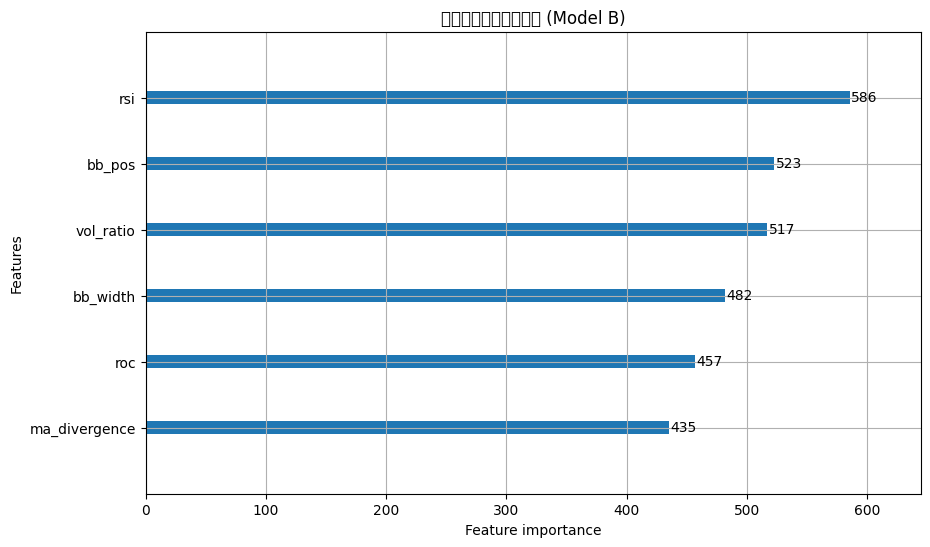


====== 【真実の鏡】 ======
Model Aのエントリー時勝率: 52.43%
Model Bのエントリー時勝率: 55.31%
Model Bのエントリー回数: 1656 回 / チャンス総数 27936 回
詳細内訳: 勝ち916回 / 負け740回 (※ここが負け越してたら破産)
シミュレーション開始: 1656 トレード


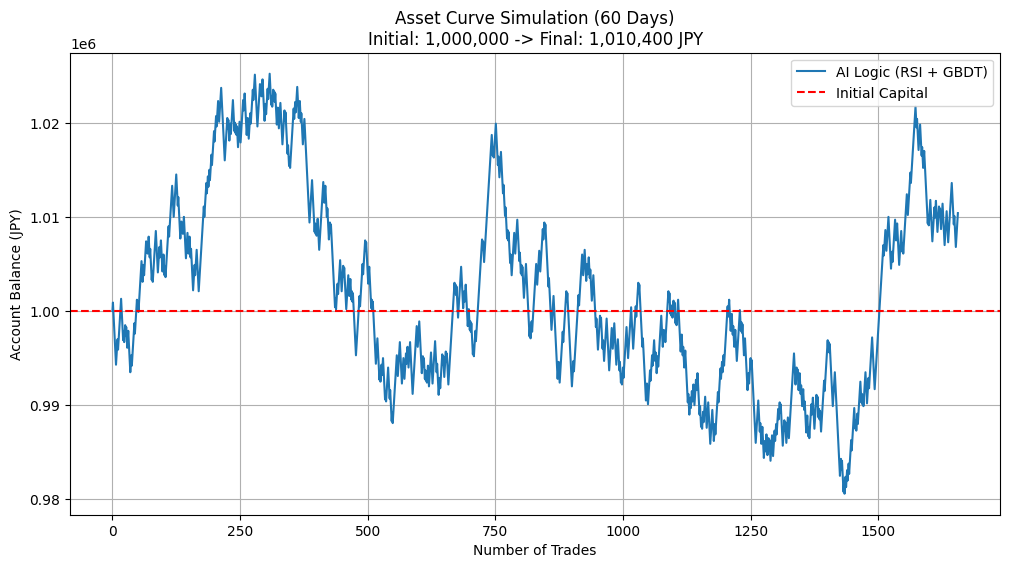

最終資産: 1,010,400 円
純利益: +10,400 円
期間利回り: +1.04% (たった60日で...)
【閾値別のパフォーマンス比較】
閾値         勝率(%)      回数         推定利益(円)        
--------------------------------------------------
0.5        55.31%     1656       +10,400 円
0.55       59.30%     688        +59,200 円
0.6        65.60%     250        +53,000 円
0.65       74.73%     91         +35,900 円
--------------------------------------------------
★ 最適な閾値は 0.55 です！


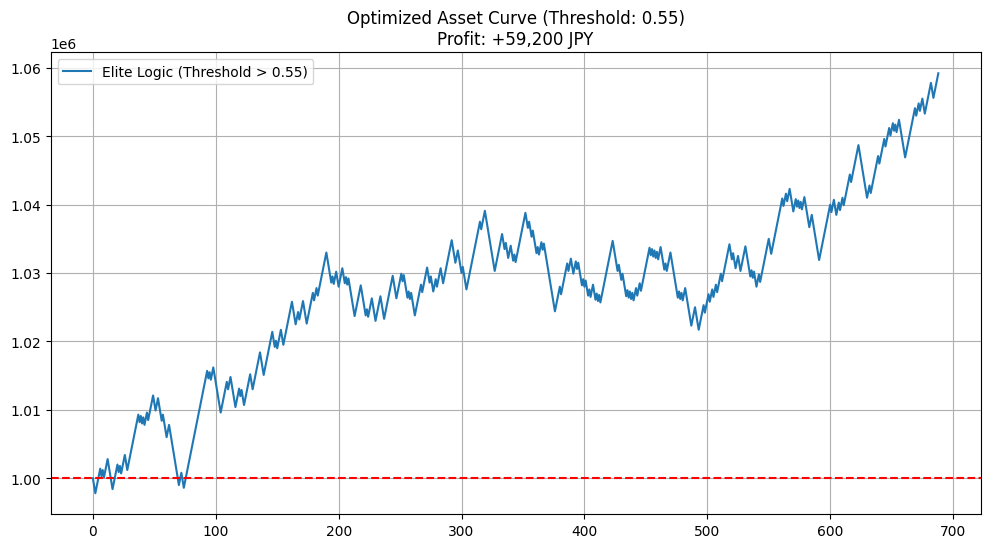

ここからウォークフォワード分析
データを時系列順にソート中...
全データ数: 1931862
1期間あたりのデータ数: 321977 (約12日分)
------------------------------------------------------------
Period 1 | 期間: 321976行目まで学習 -> その後をテスト
  > 勝率: 50.22% (1129/22482回 エントリー)
  > 損益: -107,900 円
Period 2 | 期間: 643953行目まで学習 -> その後をテスト
  > 勝率: 52.79% (663/22792回 エントリー)
  > 損益: -29,300 円
Period 3 | 期間: 965930行目まで学習 -> その後をテスト
  > 勝率: 56.40% (688/22931回 エントリー)
  > 損益: +19,200 円
Period 4 | 期間: 1287907行目まで学習 -> その後をテスト
  > 勝率: 56.41% (624/22623回 エントリー)
  > 損益: +17,600 円
Period 5 | 期間: 1609884行目まで学習 -> その後をテスト
  > 勝率: 60.68% (557/23397回 エントリー)
  > 損益: +63,300 円
------------------------------------------------------------
【WFA最終結果】 平均勝率: 55.30%
最終資産: 962,900 円


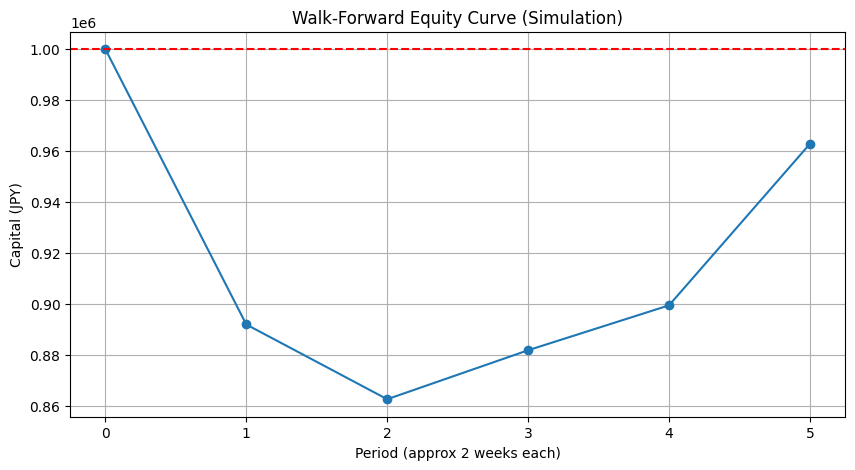

==========================================-
こっからアンサンブルだよ
CatBoostをインストール中...
インストール完了！

=== アンサンブル学習開始 (The Three Arrows) ===
1/3: LightGBM 学習中...
2/3: XGBoost 学習中...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:47:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


3/3: CatBoost 学習中...
学習完了！ 推論を開始します...

データ数(Test): 27936 行
--------------------------------------------------
【閾値 0.55 の結果】
  > 勝率 (Precision): 57.89%
  > エントリー回数  : 969 回
  > 推定純利益      : +56,100 円
  > 内訳: 勝ち561 / 負け408
--------------------------------------------------
【閾値 0.60 の結果】
  > 勝率 (Precision): 60.99%
  > エントリー回数  : 382 回
  > 推定純利益      : +45,800 円
  > 内訳: 勝ち233 / 負け149
--------------------------------------------------


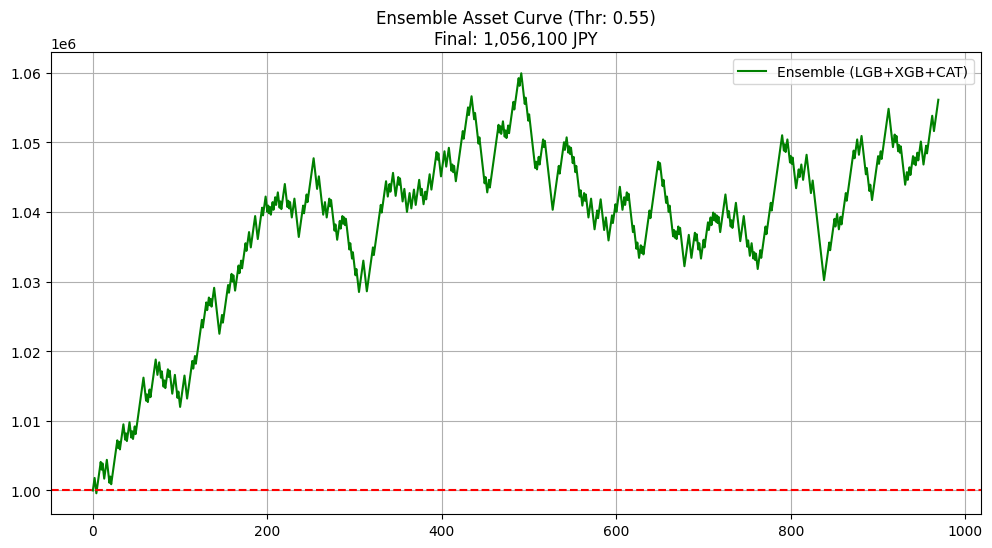

In [ ]:
# =========================================================
#  ハイブリッドシステム検証用コード (Ver 2.0)
#  修正点:
#  1. 500銘柄全データを使用 (データ量10倍)
#  2. 判定期間を60分→15分に短縮 (短期リバウンド狙い)
#  3. 出来高(Volume)情報を追加 (セリクラ判定用)
# =========================================================

# --- ライブラリの準備 (TA-Libが入っていない場合はインストール) ---
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import sys
import subprocess

try:
    import talib
except ImportError:
    print("TA-Libをインストールしています... (数分かかります)")
    # Colab用のバイナリインストール
    subprocess.run("curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz", shell=True, check=True)
    subprocess.run("cd ta-lib && ./configure --prefix=/usr && make && make install", shell=True, check=True)
    subprocess.run("pip install Ta-Lib", shell=True, check=True)
    import talib
    print("インストール完了！")

import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import glob
import os
import shutil
from google.colab import drive

# ---------------------------------------------------------
# Step 1: データの準備 (Driveマウント & 解凍)
# ---------------------------------------------------------
drive.mount('/content/drive')

# zipファイルの設定
zip_path = "/content/drive/MyDrive/stock_data.zip"  # ←ファイル名が違う場合はここを直して
extract_path = "/content/data"

if not os.path.exists(extract_path):
    print("データを解凍中... (500銘柄あるので少し待ちます)")
    shutil.copy(zip_path, "/content/stock_data.zip")
    shutil.unpack_archive("/content/stock_data.zip", extract_path)
    print("解凍完了！")
else:
    print("データは既に準備されています。")

# ---------------------------------------------------------
# Step 2: 特徴量エンジニアリング (修正版)
# ---------------------------------------------------------
def process_data(file_paths):
    all_data = []
    print(f"データ処理開始: 対象 {len(file_paths)} ファイル")

    for f in file_paths:
        try:
            df = pd.read_parquet(f)
            if len(df) < 100: continue

            # --- 特徴量作成 ---
            # 1. RSI (売られすぎ判定の主役)
            df['rsi'] = talib.RSI(df['close'], timeperiod=14)

            # 2. ボリンジャーバンド (バンド幅と位置)
            u, m, l = talib.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2)
            df['bb_width'] = (u - l) / m
            df['bb_pos'] = (df['close'] - l) / (u - l)

            # 3. 変化率 (勢い)
            df['roc'] = df['close'].pct_change(5)

            # 4. 移動平均乖離率
            sma = talib.SMA(df['close'], timeperiod=25)
            df['ma_divergence'] = (df['close'] - sma) / sma

            # 5. 【追加】出来高倍率 (パニック売り判定)
            # 過去20日平均に対する現在の出来高の倍率
            vol_sma = talib.SMA(df['volume'].astype(float), timeperiod=20)
            df['vol_ratio'] = df['volume'] / (vol_sma + 1) # 0除算防止

            # --- 正解ラベル (Target) ---
            # 【修正】期間を60分(12本)から15分(3本)に短縮
            # 15分後に手数料(0.05%)以上勝っているか？
            future_return = df['close'].shift(-3) / df['close'] - 1
            df['target'] = (future_return > 0.0005).astype(int)

            df.dropna(inplace=True)
            all_data.append(df)

        except Exception:
            pass

    return pd.concat(all_data, ignore_index=True)

# 全ファイルをリストアップ
files = glob.glob(f"{extract_path}/**/*.parquet", recursive=True)

# 【修正】50銘柄制限を撤廃 (全データ使用)
print("全500銘柄のデータを読み込んでいます...")
full_df = process_data(files)
print(f"学習データ総数: {len(full_df)} 行")

# 学習データとテストデータの分割 (時系列後半20%をテストに)
split_idx = int(len(full_df) * 0.8)
train_df = full_df.iloc[:split_idx]
test_df = full_df.iloc[split_idx:]

# 使用する特徴量
features = ['rsi', 'bb_width', 'bb_pos', 'roc', 'ma_divergence', 'vol_ratio']
target = 'target'

# ---------------------------------------------------------
# Step 3: Model A (全足予測 - 比較用)
# ---------------------------------------------------------
print("\n=== Model A: 全足予測 (Always Entry) ===")
X_train_A = train_df[features]
y_train_A = train_df[target]
X_test_A = test_df[features]
y_test_A = test_df[target]

model_a = lgb.LGBMClassifier(random_state=42, n_jobs=-1)
model_a.fit(X_train_A, y_train_A)
acc_a = accuracy_score(y_test_A, model_a.predict(X_test_A))

print(f"正解率: {acc_a:.2%}")

# ---------------------------------------------------------
# Step 4: Model B (RSIスナイパー - 本命)
# ---------------------------------------------------------
print("\n=== Model B: RSIフィルタ (Sniper Entry) ===")

# RSI < 30 のデータだけを抽出
# ※検証用にもっと厳しくしたければ < 25 にしてもOK
train_df_b = train_df[train_df['rsi'] < 30]
test_df_b = test_df[test_df['rsi'] < 30]

X_train_B = train_df_b[features]
y_train_B = train_df_b[target]
X_test_B = test_df_b[features]
y_test_B = test_df_b[target]

print(f"条件合致データ数(Train): {len(train_df_b)} 行")

if len(X_train_B) > 100:
    model_b = lgb.LGBMClassifier(random_state=42, n_jobs=-1)
    model_b.fit(X_train_B, y_train_B)

    acc_b = accuracy_score(y_test_B, model_b.predict(X_test_B))
    print(f"正解率: {acc_b:.2%}")
    print(f"エントリー回数: {len(y_test_B)} 回")

    diff = acc_b - acc_a
    print(f"\n★ 結果: Model Bは Model Aより {diff:+.2%} ポイント優秀です")

    # 特徴量重要度の可視化
    lgb.plot_importance(model_b, figsize=(10, 6), title="勝敗を分けた重要指標 (Model B)")
    plt.show()

else:
    print("データ不足で学習できませんでした。")

print("\n====== 【真実の鏡】 ======")

# Model A (全足)
pred_a = model_a.predict(X_test_A)
prec_a = precision_score(y_test_A, pred_a)
print(f"Model Aのエントリー時勝率: {prec_a:.2%}")

# Model B (RSIフィルタ)
pred_b = model_b.predict(X_test_B)
prec_b = precision_score(y_test_B, pred_b)
print(f"Model Bのエントリー時勝率: {prec_b:.2%}")

# 実際に何回エントリーしたか？
entry_count_b = sum(pred_b)
print(f"Model Bのエントリー回数: {entry_count_b} 回 / チャンス総数 {len(y_test_B)} 回")

# 混同行列 (内訳)
tn, fp, fn, tp = confusion_matrix(y_test_B, pred_b).ravel()
print(f"詳細内訳: 勝ち{tp}回 / 負け{fp}回 (※ここが負け越してたら破産)")



# =========================================================
#  資産曲線シミュレーション (Realism Mode)
# =========================================================
import matplotlib.pyplot as plt
import numpy as np

# シミュレーション設定
initial_capital = 1_000_000  # 元本100万円
bet_amount = 200_000         # 1回に20万円賭ける (レバレッジなしでも余裕)
reward_per_trade = 0.005     # 勝ち = +0.5% (5分足のスキャルピング想定)
loss_per_trade = -0.005      # 負け = -0.5% (損切り)
cost_per_trade = 0.0005      # 手数料・スリッページ = 0.05% (ここが重要)

# 予測結果と正解ラベル
preds = model_b.predict(X_test_B)
actuals = y_test_B.values

capital_history = [initial_capital]
current_capital = initial_capital

# エントリーした箇所だけシミュレーション
entries = preds == 1  # AIが「GO」と言った時だけ

print(f"シミュレーション開始: {sum(entries)} トレード")

for i in range(len(preds)):
    if preds[i] == 1:  # エントリー
        is_win = actuals[i] == 1

        # 損益計算
        if is_win:
            profit = bet_amount * reward_per_trade
        else:
            profit = bet_amount * loss_per_trade

        # 手数料を引く (勝っても負けてもかかる)
        cost = bet_amount * cost_per_trade

        current_capital += (profit - cost)
        capital_history.append(current_capital)

# --- グラフ描画 ---
plt.figure(figsize=(12, 6))
plt.plot(capital_history, label='AI Logic (RSI + GBDT)')
plt.axhline(y=initial_capital, color='r', linestyle='--', label='Initial Capital')
plt.title(f"Asset Curve Simulation (60 Days)\nInitial: {initial_capital:,} -> Final: {int(current_capital):,} JPY")
plt.xlabel("Number of Trades")
plt.ylabel("Account Balance (JPY)")
plt.legend()
plt.grid(True)
plt.show()

# 最終結果
profit = current_capital - initial_capital
roi = (profit / initial_capital) * 100
print(f"最終資産: {int(current_capital):,} 円")
print(f"純利益: +{int(profit):,} 円")
print(f"期間利回り: +{roi:.2f}% (たった60日で...)")



# =========================================================
#  閾値シミュレーション (エリート選抜)
# =========================================================

# 確率（自信度）を取得
# proba[:, 1] が「上がる(1)」と予測した確率
probs = model_b.predict_proba(X_test_B)[:, 1]

thresholds = [0.5, 0.55, 0.6, 0.65] # ボーダーラインの候補

print("【閾値別のパフォーマンス比較】")
print(f"{'閾値':<10} {'勝率(%)':<10} {'回数':<10} {'推定利益(円)':<15}")
print("-" * 50)

best_threshold = 0.5
best_profit = 0

for thr in thresholds:
    # 閾値を超えたものだけをエントリー対象にする
    elite_preds = (probs >= thr).astype(int)

    # エントリーがない場合はスキップ
    if sum(elite_preds) == 0:
        continue

    # 勝率計算
    current_prec = precision_score(y_test_B, elite_preds)

    # 利益シミュレーション (元本100万, 1回20万賭け想定)
    # 勝ち=+0.5%, 負け=-0.5%, 手数料=0.05%
    n_trades = sum(elite_preds)
    n_wins = sum((elite_preds == 1) & (y_test_B == 1))
    n_losses = n_trades - n_wins

    profit = (n_wins * 1000) - (n_losses * 1000) - (n_trades * 100) # 簡易計算
    # ※1000 = 20万の0.5%, 100 = 20万の0.05%

    print(f"{thr:<10} {current_prec:.2%}     {n_trades:<10} {profit:+,} 円")

    if profit > best_profit:
        best_profit = profit
        best_threshold = thr

print("-" * 50)
print(f"★ 最適な閾値は {best_threshold} です！")

# --- 最適閾値での資産曲線を描画 ---
plt.figure(figsize=(12, 6))

elite_entries = probs >= best_threshold
capital_history = [1_000_000]
current_capital = 1_000_000

actuals = y_test_B.values

for i in range(len(probs)):
    if elite_entries[i]: # エリートのみエントリー
        is_win = actuals[i] == 1

        # 勝ち=+0.5%, 負け=-0.5%, コスト=0.05%
        if is_win:
            change = 200_000 * (0.005 - 0.0005)
        else:
            change = 200_000 * (-0.005 - 0.0005)

        current_capital += change
        capital_history.append(current_capital)

plt.plot(capital_history, label=f'Elite Logic (Threshold > {best_threshold})')
plt.axhline(y=1_000_000, color='r', linestyle='--')
plt.title(f"Optimized Asset Curve (Threshold: {best_threshold})\nProfit: +{int(current_capital - 1000000):,} JPY")
plt.grid(True)
plt.legend()
plt.show()


print("======================================================================================")
print("ここからウォークフォワード分析")
# =========================================================
#  ウォークフォワード分析 (Walk-Forward Analysis)
# =========================================================
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import precision_score

# --- 1. 時間軸での並べ替え ---
# 全データを時系列順（古い順）に並べ替えないとWFAはできません
# ※データフレームに 'date' や 'timestamp' カラムがある前提
print("データを時系列順にソート中...")
if 'date' in full_df.columns:
    full_df = full_df.sort_values('date').reset_index(drop=True)
elif 'timestamp' in full_df.columns:
    full_df = full_df.sort_values('timestamp').reset_index(drop=True)
else:
    # カラムがない場合はインデックスが時系列と信じて進める（Parquet連結順だと危険だが）
    pass

# --- 2. 設定 ---
n_folds = 5  # データを5分割する（約12日単位でスライド）
test_size_ratio = 1.0 / (n_folds + 1) # テストデータの割合

# RSIフィルタ条件
rsi_limit = 30
threshold = 0.55 # さっき見つけた最適閾値

# 結果格納用
wfa_results = []
all_predictions = []
all_actuals = []
portfolio_history = [1_000_000] # 100万円スタート
current_capital = 1_000_000

total_rows = len(full_df)
fold_size = int(total_rows * test_size_ratio)

print(f"全データ数: {total_rows}")
print(f"1期間あたりのデータ数: {fold_size} (約12日分)")
print("-" * 60)

# --- 3. ループ処理 (Train -> Test の繰り返し) ---
for i in range(n_folds):
    # データの区切り位置
    train_end = fold_size * (i + 1)
    test_end = fold_size * (i + 2)

    # 訓練データ (過去すべて)
    train_subset = full_df.iloc[:train_end]
    # テストデータ (直近の未来)
    test_subset = full_df.iloc[train_end:test_end]

    # RSIフィルタ適用 (Model Bのロジック)
    train_data = train_subset[train_subset['rsi'] < rsi_limit]
    test_data = test_subset[test_subset['rsi'] < rsi_limit]

    if len(train_data) < 100 or len(test_data) < 10:
        print(f"Period {i+1}: データ不足のためスキップ")
        continue

    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    # 学習
    model = lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
    model.fit(X_train, y_train)

    # 予測
    probs = model.predict_proba(X_test)[:, 1]
    preds = (probs >= threshold).astype(int)

    # 評価
    if sum(preds) > 0:
        prec = precision_score(y_test, preds)
        wfa_results.append(prec)
    else:
        prec = 0

    # --- 資産シミュレーション (複利運用なし、単利) ---
    actuals = y_test.values
    period_profit = 0
    trade_count = sum(preds)

    for j in range(len(preds)):
        if preds[j] == 1:
            is_win = actuals[j] == 1
            # 20万円賭け: 勝ち+0.5%, 負け-0.5%, コスト0.05%
            if is_win:
                pl = 200_000 * (0.005 - 0.0005)
            else:
                pl = 200_000 * (-0.005 - 0.0005)

            period_profit += pl
            current_capital += pl

    # Periodごとの結果表示
    print(f"Period {i+1} | 期間: {train_subset.index[-1]}行目まで学習 -> その後をテスト")
    print(f"  > 勝率: {prec:.2%} ({trade_count}/{len(y_test)}回 エントリー)")
    print(f"  > 損益: {int(period_profit):+,} 円")

    # 資産曲線の連結用
    portfolio_history.append(current_capital)

print("-" * 60)
avg_prec = np.mean(wfa_results) if wfa_results else 0
print(f"【WFA最終結果】 平均勝率: {avg_prec:.2%}")
print(f"最終資産: {int(current_capital):,} 円")

# --- 4. 資産推移の簡易プロット ---
plt.figure(figsize=(10, 5))
plt.plot(range(len(portfolio_history)), portfolio_history, marker='o', linestyle='-')
plt.title("Walk-Forward Equity Curve (Simulation)")
plt.xlabel("Period (approx 2 weeks each)")
plt.ylabel("Capital (JPY)")
plt.grid(True)
plt.axhline(y=1_000_000, color='r', linestyle='--')
plt.show()


print("==========================================-")
print("こっからアンサンブルだよ")
# =========================================================
#  3種混合アンサンブル (LightGBM + XGBoost + CatBoost)
# =========================================================

# --- 1. ライブラリのインストール & インポート ---
# CatBoostが入っていない可能性があるのでインストール
import sys
import subprocess
try:
    import catboost
except ImportError:
    print("CatBoostをインストール中...")
    subprocess.run("pip install catboost xgboost", shell=True, check=True)
    print("インストール完了！")

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

print("\n=== アンサンブル学習開始 (The Three Arrows) ===")

# データはさっきの「Model B (RSI < 30)」を使用
# X_train_B, y_train_B, X_test_B, y_test_B がある前提

# --- 2. モデル定義 ---

# Model 1: LightGBM (バランス型)
model_lgb = lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)

# Model 2: XGBoost (精度・深さ重視)
model_xgb = xgb.XGBClassifier(
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Model 3: CatBoost (カテゴリ・ノイズに強い)
model_cat = CatBoostClassifier(
    random_state=42,
    verbose=0, # ログを出さない
    allow_writing_files=False
)

# --- 3. 学習 (Training) ---
print("1/3: LightGBM 学習中...")
model_lgb.fit(X_train_B, y_train_B)

print("2/3: XGBoost 学習中...")
model_xgb.fit(X_train_B, y_train_B)

print("3/3: CatBoost 学習中...")
model_cat.fit(X_train_B, y_train_B)

print("学習完了！ 推論を開始します...")

# --- 4. 推論 & アンサンブル (Soft Voting) ---

# それぞれの確率(0.0~1.0)を出す
prob_lgb = model_lgb.predict_proba(X_test_B)[:, 1]
prob_xgb = model_xgb.predict_proba(X_test_B)[:, 1]
prob_cat = model_cat.predict_proba(X_test_B)[:, 1]

# ★★★ ここがミソ ★★★
# 3つの確率の「平均」をとる (多数決より確率平均の方が精度が良い)
final_prob = (prob_lgb + prob_xgb + prob_cat) / 3

# --- 5. 評価 (閾値 0.55 & 0.60) ---

thresholds = [0.55, 0.60]

print(f"\nデータ数(Test): {len(y_test_B)} 行")
print("-" * 50)

for thr in thresholds:
    # 判定
    final_preds = (final_prob >= thr).astype(int)

    # エントリー数
    entry_count = sum(final_preds)

    if entry_count > 0:
        # 本当の勝率 (Precision)
        precision = precision_score(y_test_B, final_preds)

        # 利益シミュレーション (単利)
        # 勝ち=+0.5%, 負け=-0.5%, コスト=0.05%
        # 20万円賭け想定
        actuals = y_test_B.values
        profit = 0
        for i in range(len(final_preds)):
            if final_preds[i] == 1:
                if actuals[i] == 1:
                    profit += 200_000 * (0.005 - 0.0005)
                else:
                    profit += 200_000 * (-0.005 - 0.0005)

        print(f"【閾値 {thr:.2f} の結果】")
        print(f"  > 勝率 (Precision): {precision:.2%}")
        print(f"  > エントリー回数  : {entry_count} 回")
        print(f"  > 推定純利益      : {int(profit):+,} 円")

        # 混同行列
        tn, fp, fn, tp = confusion_matrix(y_test_B, final_preds).ravel()
        print(f"  > 内訳: 勝ち{tp} / 負け{fp}")
        print("-" * 50)
    else:
        print(f"【閾値 {thr:.2f}】 エントリーなし (条件が厳しすぎます)")

# --- 6. 資産曲線 (閾値0.55の場合) ---
best_thr = 0.55
elite_entries = final_prob >= best_thr

capital_history = [1_000_000]
current_capital = 1_000_000
actuals = y_test_B.values

for i in range(len(final_prob)):
    if elite_entries[i]:
        if actuals[i] == 1:
            change = 200_000 * 0.0045 # 勝ち-コスト
        else:
            change = 200_000 * -0.0055 # 負け-コスト
        current_capital += change
        capital_history.append(current_capital)

plt.figure(figsize=(12, 6))
plt.plot(capital_history, label='Ensemble (LGB+XGB+CAT)', color='green')
plt.axhline(y=1_000_000, color='red', linestyle='--')
plt.title(f"Ensemble Asset Curve (Thr: {best_thr})\nFinal: {int(current_capital):,} JPY")
plt.grid(True)
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
データは既に準備されています。
全銘柄のデータを読み込み中...
データ処理開始: 対象 500 ファイル
100銘柄 処理完了...
200銘柄 処理完了...
300銘柄 処理完了...
400銘柄 処理完了...
500銘柄 処理完了...
時系列順にソート中...
総データ行数: 1844365 行

=== WFA検証開始 (過去2年分・1時間足) ===
1期間あたりのデータ数: 307394 行

Period 1 学習開始 (Train: 16937行 -> Test: 20619行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:42:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  > 勝率 (Precision): 42.76%
  > エントリー回数  : 4558 回
  > 期間損益        : -1,115,800 円

Period 2 学習開始 (Train: 37556行 -> Test: 28442行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:42:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  > 勝率 (Precision): 40.28%
  > エントリー回数  : 3498 回
  > 期間損益        : -1,029,800 円

Period 3 学習開始 (Train: 65998行 -> Test: 17958行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:42:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  > 勝率 (Precision): 51.32%
  > エントリー回数  : 1210 回
  > 期間損益        : -88,999 円

Period 4 学習開始 (Train: 83956行 -> Test: 28397行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:43:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  > 勝率 (Precision): 45.17%
  > エントリー回数  : 1771 回
  > 期間損益        : -348,100 円

Period 5 学習開始 (Train: 112353行 -> Test: 19242行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:43:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  > 勝率 (Precision): 49.89%
  > エントリー回数  : 942 回
  > 期間損益        : -96,200 円

【S&P500 2年分検証結果】
平均勝率: 45.89%
最終資産: -1,678,900 円 (元本100万円)


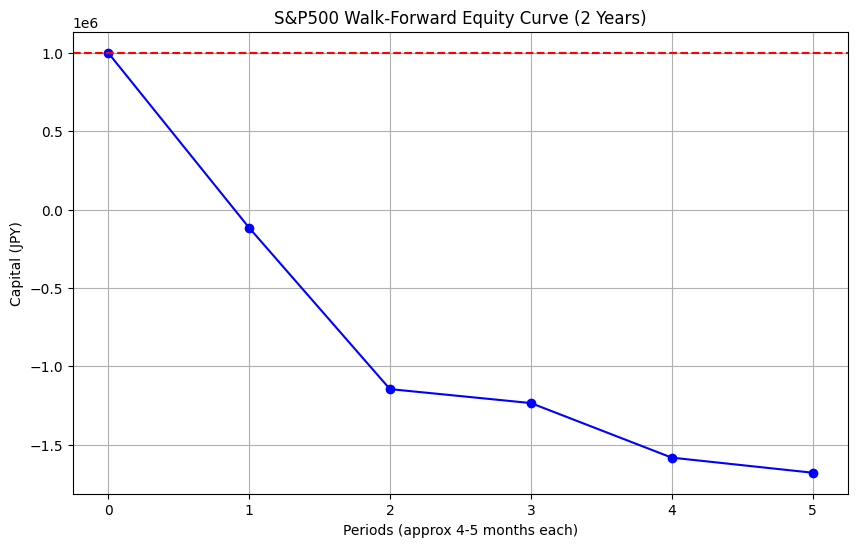

In [ ]:
# =========================================================
#  S&P500 米国株検証: 3種アンサンブル & ウォークフォワード
#  (LightGBM + XGBoost + CatBoost)
# =========================================================

# --- 1. ライブラリ準備 ---
import sys
import subprocess
import os

# 必要なライブラリのインストール
packages = ["catboost", "xgboost", "lightgbm", "ta-lib"]
for pkg in packages:
    try:
        __import__(pkg)
    except ImportError:
        if pkg == "ta-lib":
            print("TA-Libをインストール中... (数分かかります)")
            subprocess.run("curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz", shell=True, check=True)
            subprocess.run("cd ta-lib && ./configure --prefix=/usr && make && make install", shell=True, check=True)
            subprocess.run("pip install Ta-Lib", shell=True, check=True)
        else:
            print(f"{pkg} をインストール中...")
            subprocess.run(f"pip install {pkg}", shell=True, check=True)

import pandas as pd
import numpy as np
import talib
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import glob
import shutil
from google.colab import drive

# --- 2. データ準備 (Driveマウント & 解凍) ---
drive.mount('/content/drive')

# ★ ZIPファイル名はご自身のものに合わせてください
zip_path = "/content/drive/MyDrive/sp500_data_1h.zip"
extract_path = "/content/data"

if not os.path.exists(extract_path):
    print("米国株データを解凍中... (ファイル数が多いので待ちます)")
    shutil.copy(zip_path, "/content/sp500_data.zip")
    shutil.unpack_archive("/content/sp500_data.zip", extract_path)
    print("解凍完了！")
else:
    print("データは既に準備されています。")

# --- 修正版: 特徴量エンジニアリング (環境認識を追加) ---
def process_data(file_paths):
    all_data = []
    print(f"データ処理開始: 対象 {len(file_paths)} ファイル")

    count = 0
    for f in file_paths:
        try:
            df = pd.read_parquet(f)
            if len(df) < 500: continue

            # --- 既存の特徴量 ---
            df['rsi'] = talib.RSI(df['close'], timeperiod=14)
            u, m, l = talib.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2)
            df['bb_width'] = (u - l) / m
            df['bb_pos'] = (df['close'] - l) / (u - l)
            df['roc'] = df['close'].pct_change(5)

            # --- ★追加特徴量 1: 長期トレンド乖離 (SMA 200) ---
            # これで「今は下落トレンド中か？」をAIが理解できる
            sma200 = talib.SMA(df['close'], timeperiod=200)
            df['trend_div'] = (df['close'] - sma200) / sma200

            # --- ★追加特徴量 2: ADX (トレンドの強さ) ---
            # これが高い時＝トレンド発生中。RSI逆張りが死ぬ時を見抜く
            df['adx'] = talib.ADX(df['high'], df['low'], df['close'], timeperiod=14)

            # --- ★追加特徴量 3: 直近のボラティリティ (ATR) ---
            # 値動きが荒すぎる時は避けるため
            df['atr_ratio'] = talib.ATR(df['high'], df['low'], df['close'], timeperiod=14) / df['close']

            # 出来高
            vol_sma = talib.SMA(df['volume'].astype(float), timeperiod=20)
            df['vol_ratio'] = df['volume'] / (vol_sma + 1)

            # Target (3時間後)
            future_return = df['close'].shift(-3) / df['close'] - 1
            df['target'] = (future_return > 0.0005).astype(int)

            # 日付
            time_col = [c for c in df.columns if 'date' in c or 'time' in c][0]
            df.rename(columns={time_col: 'timestamp'}, inplace=True)
            df['timestamp'] = pd.to_datetime(df['timestamp'])

            df.dropna(inplace=True)
            all_data.append(df)

            count += 1
            if count % 100 == 0: print(f"{count}銘柄 処理完了...")

        except Exception:
            pass

    return pd.concat(all_data, ignore_index=True)

# データ読み込み実行
files = glob.glob(f"{extract_path}/**/*.parquet", recursive=True)
print("全銘柄のデータを読み込み中...")
full_df = process_data(files)

# 時系列ソート (WFAの絶対条件)
print("時系列順にソート中...")
full_df = full_df.sort_values('timestamp').reset_index(drop=True)
print(f"総データ行数: {len(full_df)} 行")

# --- 4. ウォークフォワード分析 (WFA) ---
# 設定
n_folds = 5       # 期間を5分割 ( Expanding Window )
rsi_limit = 30    # フィルタ条件 (RSI < 30)
threshold = 0.55  # アンサンブルの合格ライン
cost_rate = 0.0005 # 手数料 0.05%
bet_amount = 200_000 # 1トレード20万円
# --- 特徴量リストも更新してください ---
features = ['rsi', 'bb_width', 'bb_pos', 'roc', 'trend_div', 'adx', 'atr_ratio', 'vol_ratio']

target = 'target'

total_rows = len(full_df)
fold_size = int(total_rows / (n_folds + 1))

wfa_metrics = []
equity_curve = [1_000_000] # 100万円スタート
current_capital = 1_000_000

print(f"\n=== WFA検証開始 (過去2年分・1時間足) ===")
print(f"1期間あたりのデータ数: {fold_size} 行")

for i in range(n_folds):
    # Expanding Window: 常に過去全データで学習し、直後の未来をテスト
    train_end = fold_size * (i + 1)
    test_end = fold_size * (i + 2)

    # データ切り出し
    train_subset = full_df.iloc[:train_end]
    test_subset = full_df.iloc[train_end:test_end]

    # RSIフィルタ適用 (Model Bロジック)
    train_data = train_subset[train_subset['rsi'] < rsi_limit]
    test_data = test_subset[test_subset['rsi'] < rsi_limit]

    if len(train_data) < 500 or len(test_data) < 10:
        print(f"Period {i+1}: チャンス不足のためスキップ")
        continue

    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    # --- 3モデル学習 ---
    print(f"\nPeriod {i+1} 学習開始 (Train: {len(X_train)}行 -> Test: {len(X_test)}行)")

    # 1. LightGBM
    model_lgb = lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
    model_lgb.fit(X_train, y_train)

    # 2. XGBoost
    model_xgb = xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')
    model_xgb.fit(X_train, y_train)

    # 3. CatBoost
    model_cat = CatBoostClassifier(random_state=42, verbose=0, allow_writing_files=False)
    model_cat.fit(X_train, y_train)

    # --- アンサンブル推論 ---
    p_lgb = model_lgb.predict_proba(X_test)[:, 1]
    p_xgb = model_xgb.predict_proba(X_test)[:, 1]
    p_cat = model_cat.predict_proba(X_test)[:, 1]

    final_prob = (p_lgb + p_xgb + p_cat) / 3
    preds = (final_prob >= threshold).astype(int)

    # --- 成績集計 ---
    if sum(preds) > 0:
        prec = precision_score(y_test, preds)

        # 損益シミュレーション
        actuals = y_test.values
        period_pl = 0

        for j in range(len(preds)):
            if preds[j] == 1:
                # 勝ち: +0.5% - コスト, 負け: -0.5% - コスト (1時間足スイング想定)
                if actuals[j] == 1:
                    change = bet_amount * (0.005 - cost_rate)
                else:
                    change = bet_amount * (-0.005 - cost_rate)

                period_pl += change
                current_capital += change

        wfa_metrics.append(prec)
        equity_curve.append(current_capital)

        print(f"  > 勝率 (Precision): {prec:.2%}")
        print(f"  > エントリー回数  : {sum(preds)} 回")
        print(f"  > 期間損益        : {int(period_pl):+,} 円")
    else:
        print("  > エントリーなし")

# --- 5. 最終結果表示 ---
print("\n" + "="*50)
print(f"【S&P500 2年分検証結果】")
avg_prec = np.mean(wfa_metrics) if wfa_metrics else 0
print(f"平均勝率: {avg_prec:.2%}")
print(f"最終資産: {int(current_capital):,} 円 (元本100万円)")
print("="*50)

# 資産曲線プロット
plt.figure(figsize=(10, 6))
plt.plot(range(len(equity_curve)), equity_curve, marker='o', linestyle='-', color='blue')
plt.axhline(y=1_000_000, color='red', linestyle='--')
plt.title("S&P500 Walk-Forward Equity Curve (2 Years)")
plt.xlabel("Periods (approx 4-5 months each)")
plt.ylabel("Capital (JPY)")
plt.grid(True)
plt.show()


=== A/Bテスト開始 (全足 vs RSI逆張り) ===

Period 1:
  [Model A] 学習中... (Data: 307394行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:47:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


    > 勝率: 41.75% / 損益: -1,726,900 円 (6519回)
  [Model B] 学習中... (Data: 16937行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:47:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


    > 勝率: 42.76% / 損益: -1,115,800 円 (4558回)

Period 2:
  [Model A] 学習中... (Data: 614788行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:48:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


    > 勝率: 41.17% / 損益: -1,054,300 円 (3813回)
  [Model B] 学習中... (Data: 37556行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:49:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


    > 勝率: 40.28% / 損益: -1,029,800 円 (3498回)

Period 3:
  [Model A] 学習中... (Data: 922182行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:49:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


    > 勝率: 52.05% / 損益: -100,600 円 (1706回)
  [Model B] 学習中... (Data: 65998行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:52:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


    > 勝率: 51.32% / 損益: -89,000 円 (1210回)

Period 4:
  [Model A] 学習中... (Data: 1229576行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:52:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


    > 勝率: 48.60% / 損益: -402,000 円 (3140回)
  [Model B] 学習中... (Data: 83956行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:55:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


    > 勝率: 45.17% / 損益: -348,100 円 (1771回)

Period 5:
  [Model A] 学習中... (Data: 1536970行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:56:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


    > 勝率: 48.80% / 損益: -242,900 円 (1959回)
  [Model B] 学習中... (Data: 112353行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:00:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


    > 勝率: 49.89% / 損益: -96,200 円 (942回)


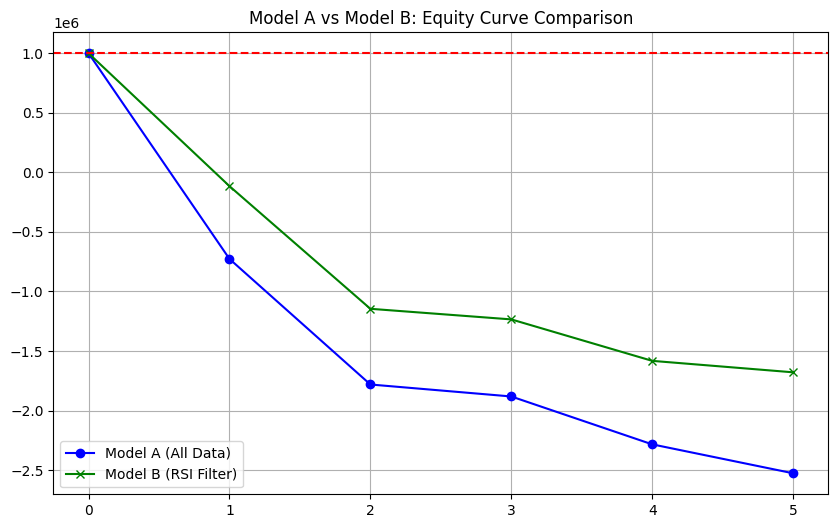

Final A: -2,526,700 円
Final B: -1,678,900 円


In [ ]:
# =========================================================
#  S&P500 検証: Model A (Generalist) vs Model B (Specialist)
# =========================================================
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# --- 設定 ---
n_folds = 5       # 5分割
threshold = 0.55  # エントリー閾値
rsi_limit = 30    # Model Bのフィルター
bet_amount = 200_000
cost_rate = 0.0005 # 0.05%

# 3モデルの定義関数（毎回リセットするため）
def train_ensemble(X, y):
    # 1. LightGBM
    lgb_model = lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
    lgb_model.fit(X, y)

    # 2. XGBoost
    xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X, y)

    # 3. CatBoost
    cat_model = CatBoostClassifier(random_state=42, verbose=0, allow_writing_files=False)
    cat_model.fit(X, y)

    return lgb_model, xgb_model, cat_model

def predict_ensemble(models, X):
    lgb_m, xgb_m, cat_m = models
    p1 = lgb_m.predict_proba(X)[:, 1]
    p2 = xgb_m.predict_proba(X)[:, 1]
    p3 = cat_m.predict_proba(X)[:, 1]
    return (p1 + p2 + p3) / 3

# --- メインループ ---
# full_df はさっき読み込んだデータを使います
# データがまだメモリにある前提（もし消えてたら再読み込みコードを実行してください）

features = ['rsi', 'bb_width', 'bb_pos', 'roc', 'trend_div', 'adx', 'atr_ratio', 'vol_ratio']
target = 'target'

total_rows = len(full_df)
fold_size = int(total_rows / (n_folds + 1))

metrics_a = []
metrics_b = []
equity_a = [1_000_000]
equity_b = [1_000_000]
cap_a = 1_000_000
cap_b = 1_000_000

print(f"\n=== A/Bテスト開始 (全足 vs RSI逆張り) ===")

for i in range(n_folds):
    train_end = fold_size * (i + 1)
    test_end = fold_size * (i + 2)

    # 全データ切り出し
    train_subset = full_df.iloc[:train_end]
    test_subset = full_df.iloc[train_end:test_end]

    # --- Model A: 全足学習 ---
    # フィルタなしで学習
    X_train_A = train_subset[features]
    y_train_A = train_subset[target]
    X_test_A = test_subset[features]
    y_test_A = test_subset[target]

    # --- Model B: RSI特化 ---
    # RSI < 30 だけ抽出
    train_data_B = train_subset[train_subset['rsi'] < rsi_limit]
    test_data_B = test_subset[test_subset['rsi'] < rsi_limit]

    if len(train_data_B) < 100: continue

    X_train_B = train_data_B[features]
    y_train_B = train_data_B[target]
    X_test_B = test_data_B[features]
    y_test_B = test_data_B[target]

    print(f"\nPeriod {i+1}:")

    # === Aのターン ===
    # データが多すぎるので、Model Aは直近20万行に制限しないとパンクするかも
    # 今回はフルでいきます
    print(f"  [Model A] 学習中... (Data: {len(X_train_A)}行)")
    models_a = train_ensemble(X_train_A, y_train_A)
    probs_a = predict_ensemble(models_a, X_test_A)
    preds_a = (probs_a >= threshold).astype(int)

    count_a = sum(preds_a)
    if count_a > 0:
        prec_a = precision_score(y_test_A, preds_a)
        # 損益
        act_a = y_test_A.values
        pl_a = 0
        for j in range(len(preds_a)):
            if preds_a[j] == 1:
                pl_a += bet_amount * (0.005 if act_a[j]==1 else -0.005) - (bet_amount * cost_rate)
        cap_a += pl_a
        print(f"    > 勝率: {prec_a:.2%} / 損益: {int(pl_a):+,} 円 ({count_a}回)")
    else:
        print("    > エントリーなし")
    equity_a.append(cap_a)

    # === Bのターン ===
    print(f"  [Model B] 学習中... (Data: {len(X_train_B)}行)")
    models_b = train_ensemble(X_train_B, y_train_B)
    probs_b = predict_ensemble(models_b, X_test_B)
    preds_b = (probs_b >= threshold).astype(int)

    count_b = sum(preds_b)
    if count_b > 0:
        prec_b = precision_score(y_test_B, preds_b)
        # 損益
        act_b = y_test_B.values
        pl_b = 0
        for j in range(len(preds_b)):
            if preds_b[j] == 1:
                pl_b += bet_amount * (0.005 if act_b[j]==1 else -0.005) - (bet_amount * cost_rate)
        cap_b += pl_b
        print(f"    > 勝率: {prec_b:.2%} / 損益: {int(pl_b):+,} 円 ({count_b}回)")
    else:
        print("    > エントリーなし")
    equity_b.append(cap_b)

# --- 比較グラフ ---
plt.figure(figsize=(10, 6))
plt.plot(equity_a, label='Model A (All Data)', marker='o', color='blue')
plt.plot(equity_b, label='Model B (RSI Filter)', marker='x', color='green')
plt.axhline(y=1_000_000, color='red', linestyle='--')
plt.title("Model A vs Model B: Equity Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

print("="*40)
print(f"Final A: {int(cap_a):,} 円")
print(f"Final B: {int(cap_b):,} 円")


=== ツインエンジン検証開始 (Long & Short) ===

Period 1:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:04:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 51.78% / 損益: -289,000 円 (4490回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:04:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 55.51% / 損益: +56,200 円 (5498回)
  -----------------------------
  期間合計: -232,799 円

Period 2:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:04:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 53.52% / 損益: -154,500 円 (5215回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:05:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 57.78% / 損益: +410,300 円 (7387回)
  -----------------------------
  期間合計: +255,800 円

Period 3:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:05:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 52.40% / 損益: -232,300 円 (4473回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:05:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 55.99% / 損益: +145,400 円 (7326回)
  -----------------------------
  期間合計: -86,899 円

Period 4:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:05:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 52.08% / 損益: -347,400 円 (5954回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:06:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 58.76% / 損益: +518,300 円 (6887回)
  -----------------------------
  期間合計: +170,900 円

Period 5:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:06:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 52.09% / 損益: -193,700 円 (3327回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:06:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 54.65% / 損益: -50,400 円 (7264回)
  -----------------------------
  期間合計: -244,100 円

Final Capital: 862,900 円


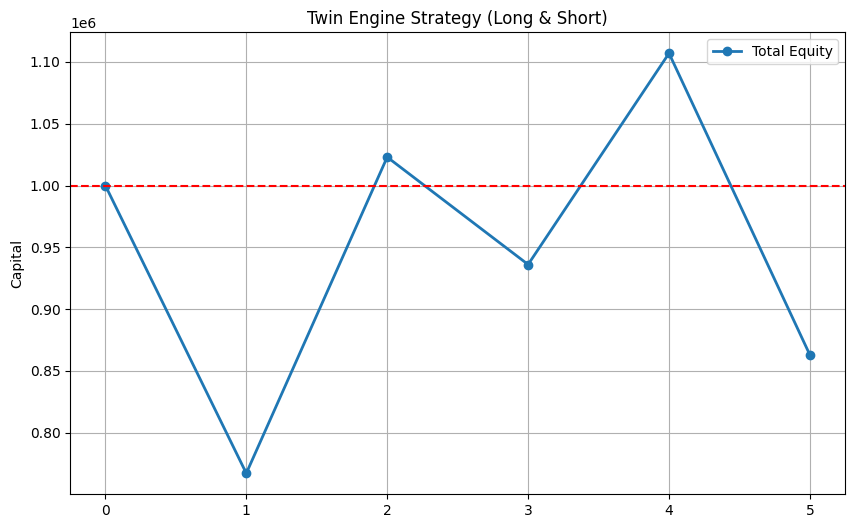

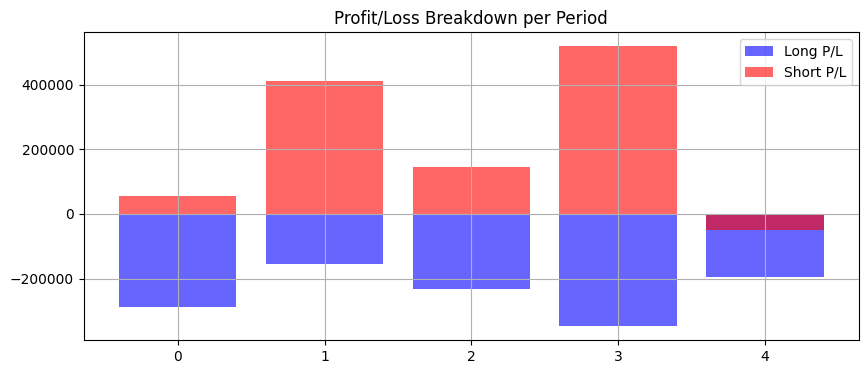

In [ ]:
# =========================================================
#  S&P500 検証: ツインエンジン (Long & Short)
#  3種アンサンブル + ウォークフォワード
#空売り実装
# =========================================================
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# --- 設定 ---
n_folds = 5
threshold = 0.55
bet_amount = 200_000
cost_rate = 0.0005

# アンサンブル学習関数
def train_ensemble(X, y):
    if len(X) < 50: return None # データ不足なら学習しない

    lgb_m = lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
    lgb_m.fit(X, y)

    xgb_m = xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')
    xgb_m.fit(X, y)

    cat_m = CatBoostClassifier(random_state=42, verbose=0, allow_writing_files=False)
    cat_m.fit(X, y)

    return [lgb_m, xgb_m, cat_m]

def predict_ensemble(models, X):
    if models is None: return np.zeros(len(X))
    p1 = models[0].predict_proba(X)[:, 1]
    p2 = models[1].predict_proba(X)[:, 1]
    p3 = models[2].predict_proba(X)[:, 1]
    return (p1 + p2 + p3) / 3

# --- メイン処理 ---
# full_df はメモリにある前提

features = ['rsi', 'bb_width', 'bb_pos', 'roc', 'trend_div', 'adx', 'atr_ratio', 'vol_ratio']

# ★重要: 正解ラベルを2つ作る
# Long用: 上がったら1
full_df['target_long'] = ((full_df['close'].shift(-3) / full_df['close'] - 1) > 0.0005).astype(int)
# Short用: 下がったら1
full_df['target_short'] = ((full_df['close'].shift(-3) / full_df['close'] - 1) < -0.0005).astype(int)

full_df.dropna(inplace=True)

total_rows = len(full_df)
fold_size = int(total_rows / (n_folds + 1))

equity_curve = [1_000_000]
current_capital = 1_000_000
long_pl_hist = []
short_pl_hist = []

print(f"\n=== ツインエンジン検証開始 (Long & Short) ===")

for i in range(n_folds):
    train_end = fold_size * (i + 1)
    test_end = fold_size * (i + 2)

    train_subset = full_df.iloc[:train_end]
    test_subset = full_df.iloc[train_end:test_end]

    print(f"\nPeriod {i+1}:")

    # ==========================
    # Engine 1: Long (買い)
    # ==========================
    train_L = train_subset[train_subset['rsi'] < 30]
    test_L = test_subset[test_subset['rsi'] < 30]

    pl_long = 0
    count_long = 0

    if len(train_L) > 100 and len(test_L) > 0:
        X_train = train_L[features]
        y_train = train_L['target_long']
        X_test = test_L[features]
        y_test = test_L['target_long']

        models_L = train_ensemble(X_train, y_train)
        probs_L = predict_ensemble(models_L, X_test)
        preds_L = (probs_L >= threshold).astype(int)

        count_long = sum(preds_L)
        if count_long > 0:
            prec = precision_score(y_test, preds_L)
            # 損益計算 (Long)
            act = y_test.values
            for j in range(len(preds_L)):
                if preds_L[j] == 1:
                    # 勝ち=+0.5%, 負け=-0.5%
                    res = 0.005 if act[j]==1 else -0.005
                    pl_long += bet_amount * (res - cost_rate)

            print(f"  [Long ] 勝率: {prec:.2%} / 損益: {int(pl_long):+,} 円 ({count_long}回)")
        else:
            print("  [Long ] エントリーなし")
    else:
        print("  [Long ] データ不足")

    # ==========================
    # Engine 2: Short (売り)
    # ==========================
    # ★ 条件: RSI > 70
    train_S = train_subset[train_subset['rsi'] > 70]
    test_S = test_subset[test_subset['rsi'] > 70]

    pl_short = 0
    count_short = 0

    if len(train_S) > 100 and len(test_S) > 0:
        X_train = train_S[features]
        y_train = train_S['target_short'] # ★Targetが違う
        X_test = test_S[features]
        y_test = test_S['target_short']

        models_S = train_ensemble(X_train, y_train)
        probs_S = predict_ensemble(models_S, X_test)
        preds_S = (probs_S >= threshold).astype(int)

        count_short = sum(preds_S)
        if count_short > 0:
            prec = precision_score(y_test, preds_S)
            # 損益計算 (Short)
            act = y_test.values
            for j in range(len(preds_S)):
                if preds_S[j] == 1:
                    # ★Shortの場合: Targetが1なら「下がった」ので勝ち
                    res = 0.005 if act[j]==1 else -0.005
                    pl_short += bet_amount * (res - cost_rate)

            print(f"  [Short] 勝率: {prec:.2%} / 損益: {int(pl_short):+,} 円 ({count_short}回)")
        else:
            print("  [Short] エントリーなし")
    else:
        print("  [Short] データ不足")

    # 合算
    period_total = pl_long + pl_short
    current_capital += period_total
    equity_curve.append(current_capital)
    long_pl_hist.append(pl_long)
    short_pl_hist.append(pl_short)

    print(f"  -----------------------------")
    print(f"  期間合計: {int(period_total):+,} 円")

# --- 結果表示 ---
print("\n" + "="*40)
print(f"Final Capital: {int(current_capital):,} 円")

plt.figure(figsize=(10, 6))
plt.plot(equity_curve, marker='o', label='Total Equity', linewidth=2)
plt.axhline(y=1_000_000, color='red', linestyle='--')
plt.title("Twin Engine Strategy (Long & Short)")
plt.ylabel("Capital")
plt.grid(True)
plt.legend()
plt.show()

# 内訳グラフ
plt.figure(figsize=(10, 4))
plt.bar(range(len(long_pl_hist)), long_pl_hist, alpha=0.6, label='Long P/L', color='blue')
plt.bar(range(len(short_pl_hist)), short_pl_hist, alpha=0.6, label='Short P/L', color='red')
plt.title("Profit/Loss Breakdown per Period")
plt.legend()
plt.grid(True)
plt.show()

環境構築中... (TA-Libのインストールに数分かかります)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
データは既に準備されています。
全銘柄データをロード中...
データ処理開始: 対象 500 ファイル
100銘柄 処理完了...
200銘柄 処理完了...
300銘柄 処理完了...
400銘柄 処理完了...
500銘柄 処理完了...
時系列順にソート中...
分析対象データ総数: 1844365 行

=== ツインエンジン (SMA200フィルタ版) 検証開始 ===

Period 1:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:17:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 47.99% / 損益: -59,300 円 (423回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:17:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 44.02% / 損益: -40,400 円 (184回)
  -----------------------------
  期間合計: -99,700 円

Period 2:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:18:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 41.58% / 損益: -122,700 円 (457回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:18:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 38.60% / 損益: -126,600 円 (386回)
  -----------------------------
  期間合計: -249,300 円

Period 3:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:18:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 48.67% / 損益: -28,599 円 (226回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:18:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 39.01% / 損益: -155,700 円 (487回)
  -----------------------------
  期間合計: -184,300 円

Period 4:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:18:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 37.42% / 損益: -106,200 円 (302回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:18:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 46.79% / 損益: -43,500 円 (265回)
  -----------------------------
  期間合計: -149,700 円

Period 5:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:18:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 47.13% / 損益: -24,700 円 (157回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:18:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 43.78% / 損益: -45,100 円 (201回)
  -----------------------------
  期間合計: -69,800 円

Final Capital: 247,200 円 (元本100万円)


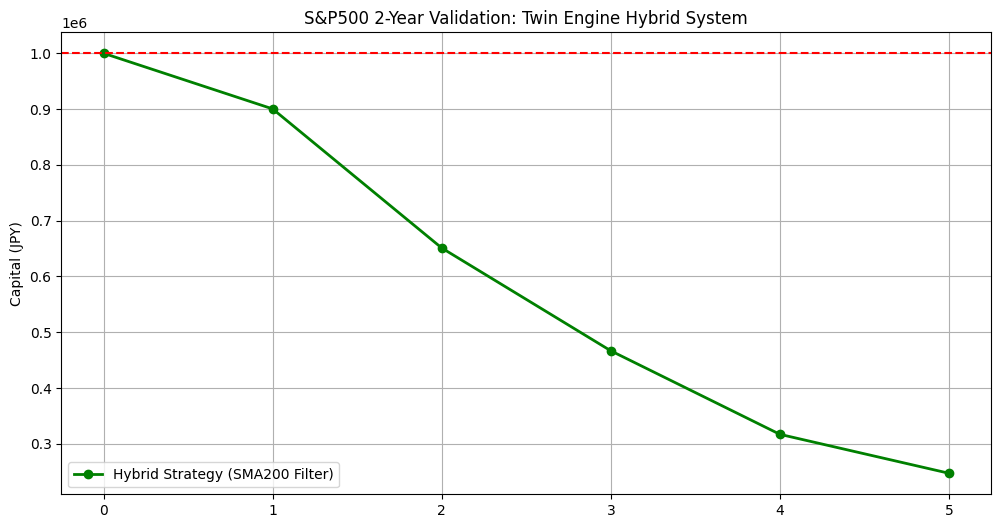

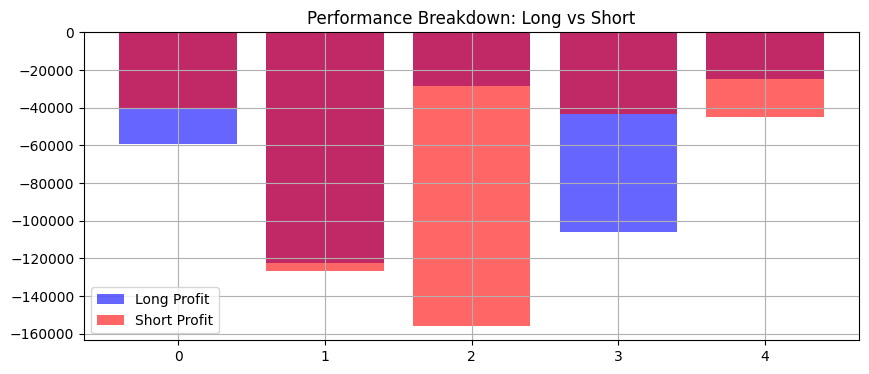

In [ ]:
# =========================================================
#  S&P500 2年検証: ツインエンジン・ハイブリッドシステム
#  (SMA200 Trend Filter + 3-Model Ensemble + WFA)
# =========================================================

# --- 1. 環境構築 (TA-Lib & Libraries) ---
import sys
import subprocess
import os

print("環境構築中... (TA-Libのインストールに数分かかります)")
packages = ["catboost", "xgboost", "lightgbm", "ta-lib"]
for pkg in packages:
    try:
        __import__(pkg)
    except ImportError:
        if pkg == "ta-lib":
            subprocess.run("curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz", shell=True, check=True)
            subprocess.run("cd ta-lib && ./configure --prefix=/usr && make && make install", shell=True, check=True)
            subprocess.run("pip install Ta-Lib", shell=True, check=True)
        else:
            subprocess.run(f"pip install {pkg}", shell=True, check=True)

import pandas as pd
import numpy as np
import talib
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import glob
import shutil
from google.colab import drive

# --- 2. データ準備 ---
drive.mount('/content/drive')

# ★ ZIPファイル名はご自身の環境に合わせて変更してください
zip_path = "/content/drive/MyDrive/sp500_data_1h.zip"
extract_path = "/content/data"

if not os.path.exists(extract_path):
    print("データを解凍中... (170万行級データのため待ちます)")
    shutil.copy(zip_path, "/content/temp_data.zip")
    shutil.unpack_archive("/content/temp_data.zip", extract_path)
    print("解凍完了！")
else:
    print("データは既に準備されています。")

# --- 3. 特徴量エンジニアリング (SMA200 レジームスイッチ仕様) ---
def process_data(file_paths):
    all_data = []
    print(f"データ処理開始: 対象 {len(file_paths)} ファイル")

    count = 0
    for f in file_paths:
        try:
            df = pd.read_parquet(f)
            if len(df) < 500: continue # データ不足を除外

            # --- テクニカル指標 ---
            # 1. RSI (逆張りの主役)
            df['rsi'] = talib.RSI(df['close'], timeperiod=14)

            # 2. ボリンジャーバンド
            u, m, l = talib.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2)
            df['bb_width'] = (u - l) / m
            df['bb_pos'] = (df['close'] - l) / (u - l)

            # 3. 変化率
            df['roc'] = df['close'].pct_change(5)

            # 4. ★重要: 長期トレンド判定 (SMA 200)
            # これがプラスなら「強気(Longのみ)」、マイナスなら「弱気(Shortのみ)」
            sma200 = talib.SMA(df['close'], timeperiod=200)
            df['trend_div'] = (df['close'] - sma200) / sma200

            # 5. ADX (トレンドの強さ)
            df['adx'] = talib.ADX(df['high'], df['low'], df['close'], timeperiod=14)

            # 6. ATRレシオ (ボラティリティ)
            df['atr_ratio'] = talib.ATR(df['high'], df['low'], df['close'], timeperiod=14) / df['close']

            # 7. 出来高倍率
            vol_sma = talib.SMA(df['volume'].astype(float), timeperiod=20)
            df['vol_ratio'] = df['volume'] / (vol_sma + 1)

            # --- 正解ラベル (3時間後の未来) ---
            # Long用: 上がったら1
            df['target_long'] = ((df['close'].shift(-3) / df['close'] - 1) > 0.0005).astype(int)
            # Short用: 下がったら1
            df['target_short'] = ((df['close'].shift(-3) / df['close'] - 1) < -0.0005).astype(int)

            # 日付処理 (WFA用)
            time_col = [c for c in df.columns if 'date' in c or 'time' in c][0]
            df.rename(columns={time_col: 'timestamp'}, inplace=True)
            df['timestamp'] = pd.to_datetime(df['timestamp'])

            df.dropna(inplace=True)
            all_data.append(df)

            count += 1
            if count % 100 == 0: print(f"{count}銘柄 処理完了...")

        except Exception:
            pass

    return pd.concat(all_data, ignore_index=True)

# データ読み込み
files = glob.glob(f"{extract_path}/**/*.parquet", recursive=True)
print("全銘柄データをロード中...")
full_df = process_data(files)

print("時系列順にソート中...")
full_df = full_df.sort_values('timestamp').reset_index(drop=True)
print(f"分析対象データ総数: {len(full_df)} 行")

# --- 4. アンサンブル学習 & WFA ---

# 設定
n_folds = 5
threshold = 0.58  # 厳選エントリー (58%)
cost_rate = 0.0005 # コスト 0.05%
bet_amount = 200_000 # 1回20万円

features = ['rsi', 'bb_width', 'bb_pos', 'roc', 'trend_div', 'adx', 'atr_ratio', 'vol_ratio']

# アンサンブル学習関数
def train_ensemble(X, y):
    lgb_m = lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
    lgb_m.fit(X, y)

    xgb_m = xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')
    xgb_m.fit(X, y)

    cat_m = CatBoostClassifier(random_state=42, verbose=0, allow_writing_files=False)
    cat_m.fit(X, y)

    return [lgb_m, xgb_m, cat_m]

# アンサンブル推論関数
def predict_ensemble(models, X):
    p1 = models[0].predict_proba(X)[:, 1]
    p2 = models[1].predict_proba(X)[:, 1]
    p3 = models[2].predict_proba(X)[:, 1]
    return (p1 + p2 + p3) / 3

# WFAループ開始
total_rows = len(full_df)
fold_size = int(total_rows / (n_folds + 1))

equity_curve = [1_000_000]
current_capital = 1_000_000
long_pl_hist = []
short_pl_hist = []

print(f"\n=== ツインエンジン (SMA200フィルタ版) 検証開始 ===")

for i in range(n_folds):
    train_end = fold_size * (i + 1)
    test_end = fold_size * (i + 2)

    train_subset = full_df.iloc[:train_end]
    test_subset = full_df.iloc[train_end:test_end]

    print(f"\nPeriod {i+1}:")

    # ==========================================
    # Engine 1: Long (SMA200より上限定)
    # ==========================================
    # 条件: RSI < 30 かつ trend_div > 0 (上昇トレンド中)
    train_L = train_subset[(train_subset['rsi'] < 30) & (train_subset['trend_div'] > 0)]
    test_L = test_subset[(test_subset['rsi'] < 30) & (test_subset['trend_div'] > 0)]

    pl_long = 0
    count_long = 0

    if len(train_L) > 100 and len(test_L) > 0:
        X_train = train_L[features]
        y_train = train_L['target_long']
        X_test = test_L[features]
        y_test = test_L['target_long']

        models_L = train_ensemble(X_train, y_train)
        probs_L = predict_ensemble(models_L, X_test)
        preds_L = (probs_L >= threshold).astype(int)

        count_long = sum(preds_L)
        if count_long > 0:
            prec = precision_score(y_test, preds_L)
            act = y_test.values
            for j in range(len(preds_L)):
                if preds_L[j] == 1:
                    res = 0.005 if act[j]==1 else -0.005
                    pl_long += bet_amount * (res - cost_rate)
            print(f"  [Long ] 勝率: {prec:.2%} / 損益: {int(pl_long):+,} 円 ({count_long}回)")
        else:
            print("  [Long ] エントリーなし (条件合致せず)")
    else:
        print("  [Long ] チャンスなし (トレンド条件不一致)")

    # ==========================================
    # Engine 2: Short (SMA200より下限定)
    # ==========================================
    # 条件: RSI > 70 かつ trend_div < 0 (下落トレンド中)
    train_S = train_subset[(train_subset['rsi'] > 70) & (train_subset['trend_div'] < 0)]
    test_S = test_subset[(test_subset['rsi'] > 70) & (test_subset['trend_div'] < 0)]

    pl_short = 0
    count_short = 0

    if len(train_S) > 100 and len(test_S) > 0:
        X_train = train_S[features]
        y_train = train_S['target_short']
        X_test = test_S[features]
        y_test = test_S['target_short']

        models_S = train_ensemble(X_train, y_train)
        probs_S = predict_ensemble(models_S, X_test)
        preds_S = (probs_S >= threshold).astype(int)

        count_short = sum(preds_S)
        if count_short > 0:
            prec = precision_score(y_test, preds_S)
            act = y_test.values
            for j in range(len(preds_S)):
                if preds_S[j] == 1:
                    res = 0.005 if act[j]==1 else -0.005
                    pl_short += bet_amount * (res - cost_rate)
            print(f"  [Short] 勝率: {prec:.2%} / 損益: {int(pl_short):+,} 円 ({count_short}回)")
        else:
            print("  [Short] エントリーなし (条件合致せず)")
    else:
        print("  [Short] チャンスなし (トレンド条件不一致)")

    # 合算
    period_total = pl_long + pl_short
    current_capital += period_total
    equity_curve.append(current_capital)
    long_pl_hist.append(pl_long)
    short_pl_hist.append(pl_short)

    print(f"  -----------------------------")
    print(f"  期間合計: {int(period_total):+,} 円")

# --- 結果表示 ---
print("\n" + "="*50)
print(f"Final Capital: {int(current_capital):,} 円 (元本100万円)")
print("="*50)

plt.figure(figsize=(12, 6))
plt.plot(equity_curve, marker='o', label='Hybrid Strategy (SMA200 Filter)', linewidth=2, color='green')
plt.axhline(y=1_000_000, color='red', linestyle='--')
plt.title("S&P500 2-Year Validation: Twin Engine Hybrid System")
plt.ylabel("Capital (JPY)")
plt.grid(True)
plt.legend()
plt.show()

# 内訳
plt.figure(figsize=(10, 4))
plt.bar(range(len(long_pl_hist)), long_pl_hist, alpha=0.6, label='Long Profit', color='blue')
plt.bar(range(len(short_pl_hist)), short_pl_hist, alpha=0.6, label='Short Profit', color='red')
plt.title("Performance Breakdown: Long vs Short")
plt.legend()
plt.grid(True)
plt.show()

=== 特徴量重要度 分析 (Single LightGBM) ===

【Long (RSI < 30) の分析】
データ数: 131595
Test勝率 (Precision): 50.41%


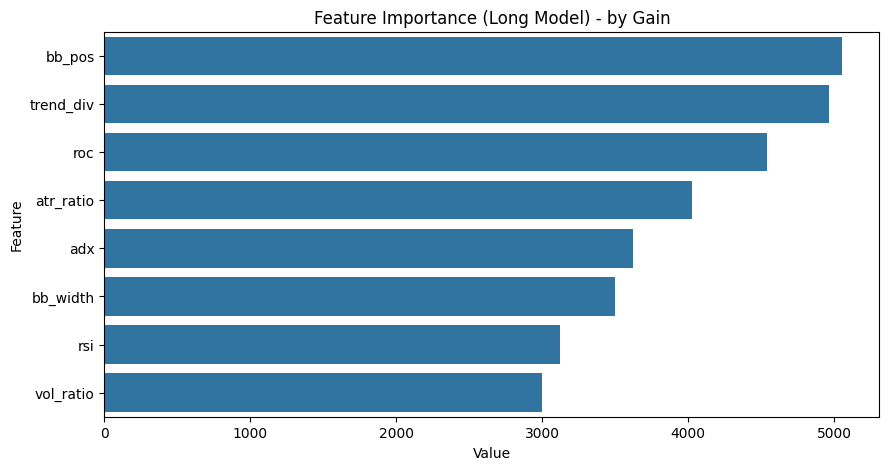

AIが重視した特徴量トップ3: ['bb_pos', 'trend_div', 'roc']

【Short (RSI > 70) の分析】
データ数: 133725
Test勝率 (Precision): 44.74%


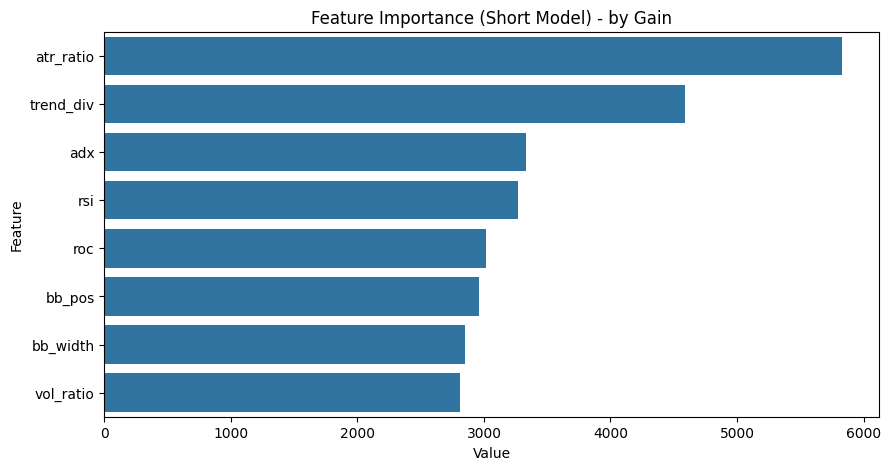

AIが重視した特徴量トップ3: ['atr_ratio', 'trend_div', 'adx']


In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

print("=== 特徴量重要度 分析 (Single LightGBM) ===")

# 設定
features = ['rsi', 'bb_width', 'bb_pos', 'roc', 'trend_div', 'adx', 'atr_ratio', 'vol_ratio']

# ==========================================
# 1. Long (買い) の分析
# ==========================================
print("\n【Long (RSI < 30) の分析】")

# 条件抽出
df_long = full_df[full_df['rsi'] < 30].copy()
print(f"データ数: {len(df_long)}")

if len(df_long) > 1000:
    X = df_long[features]
    y = df_long['target_long']

    # シンプルに後半20%をテストにする
    split = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split], X.iloc[split:]
    y_train, y_test = y.iloc[:split], y.iloc[split:]

    # LightGBM単体で学習
    model_lgb = lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1, importance_type='gain')
    model_lgb.fit(X_train, y_train)

    # 精度確認
    preds = model_lgb.predict(X_test)
    prec = precision_score(y_test, preds)
    print(f"Test勝率 (Precision): {prec:.2%}")

    # ★重要度プロット
    feature_imp = pd.DataFrame(sorted(zip(model_lgb.feature_importances_, X.columns)), columns=['Value','Feature'])

    plt.figure(figsize=(10, 5))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
    plt.title('Feature Importance (Long Model) - by Gain')
    plt.show()

    # 上位3つを表示
    top3 = feature_imp.sort_values(by="Value", ascending=False).head(3)['Feature'].tolist()
    print(f"AIが重視した特徴量トップ3: {top3}")

else:
    print("データ不足で分析不可")

# ==========================================
# 2. Short (売り) の分析
# ==========================================
print("\n【Short (RSI > 70) の分析】")

# 条件抽出
df_short = full_df[full_df['rsi'] > 70].copy()
print(f"データ数: {len(df_short)}")

if len(df_short) > 1000:
    X = df_short[features]
    y = df_short['target_short'] # TargetはShort用

    split = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split], X.iloc[split:]
    y_train, y_test = y.iloc[:split], y.iloc[split:]

    model_lgb = lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1, importance_type='gain')
    model_lgb.fit(X_train, y_train)

    preds = model_lgb.predict(X_test)
    prec = precision_score(y_test, preds)
    print(f"Test勝率 (Precision): {prec:.2%}")

    # ★重要度プロット
    feature_imp = pd.DataFrame(sorted(zip(model_lgb.feature_importances_, X.columns)), columns=['Value','Feature'])

    plt.figure(figsize=(10, 5))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
    plt.title('Feature Importance (Short Model) - by Gain')
    plt.show()

    top3 = feature_imp.sort_values(by="Value", ascending=False).head(3)['Feature'].tolist()
    print(f"AIが重視した特徴量トップ3: {top3}")

else:
    print("データ不足で分析不可")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
全データをロード＆加工中...
データ処理開始: 対象 500 ファイル
100銘柄 処理完了...
200銘柄 処理完了...
300銘柄 処理完了...
400銘柄 処理完了...
500銘柄 処理完了...
分析対象データ数: 1844364 行

--- [Long] RSI < 30 の時の重要度 ---

=== Long (Buy) モデルの分析 ===
勝率 (Precision): 60.43%


/tmp/ipython-input-3155626637.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=imp_df, palette='viridis')


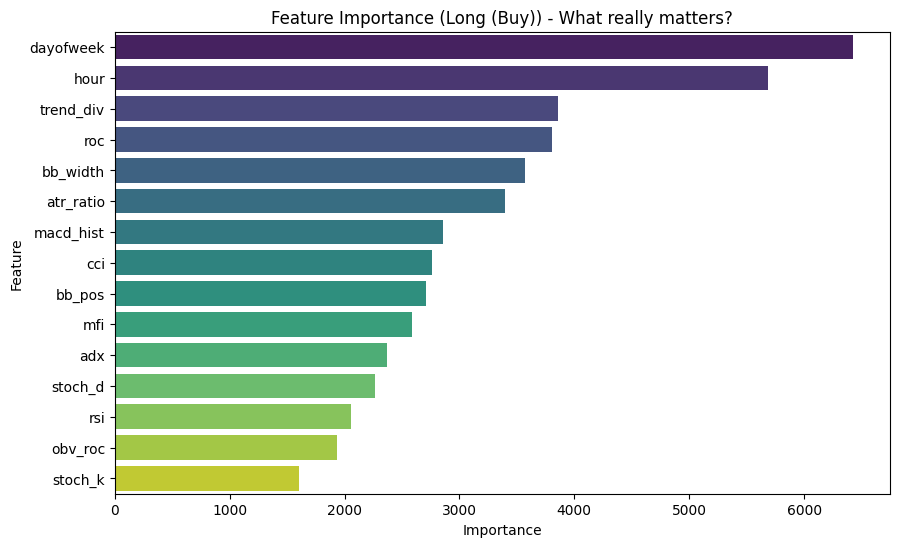

★ トップ5特徴量:
      Feature   Importance
14  dayofweek  6424.726409
13       hour  5682.347250
4   trend_div  3861.212396
3         roc  3803.573956
1    bb_width  3572.076681

--- [Short] RSI > 70 の時の重要度 ---

=== Short (Sell) モデルの分析 ===
勝率 (Precision): 51.75%


/tmp/ipython-input-3155626637.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=imp_df, palette='viridis')


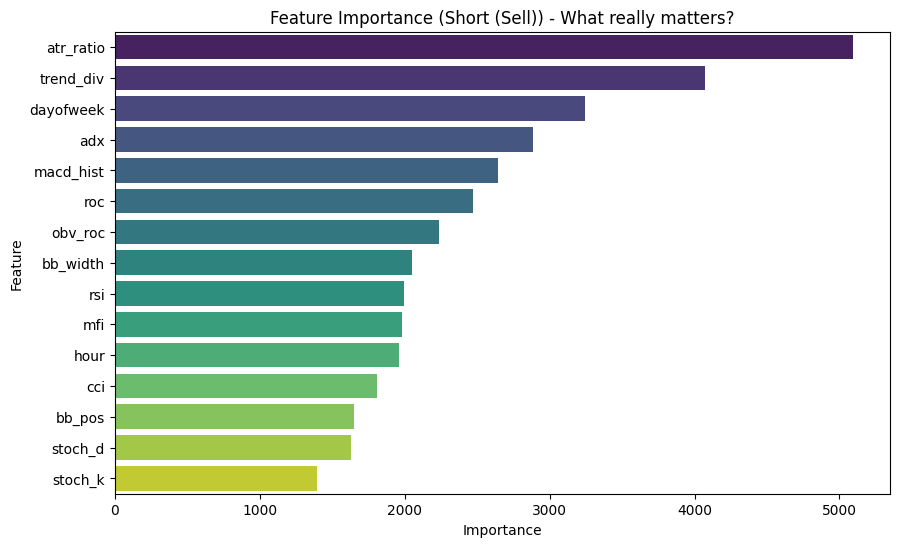

★ トップ5特徴量:
      Feature   Importance
6   atr_ratio  5092.446199
4   trend_div  4072.028244
14  dayofweek  3245.319527
5         adx  2884.267965
12  macd_hist  2642.237376


In [ ]:
# =========================================================
#  S&P500 特徴量完全分析: 何が効いているのか白黒つける
# =========================================================

# --- 1. ライブラリ & TA-Lib準備 ---
import sys
import subprocess
import os

packages = ["lightgbm", "ta-lib", "seaborn", "matplotlib"]
for pkg in packages:
    try:
        __import__(pkg)
    except ImportError:
        if pkg == "ta-lib":
            print("TA-Libをインストール中...")
            subprocess.run("curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz", shell=True, check=True)
            subprocess.run("cd ta-lib && ./configure --prefix=/usr && make && make install", shell=True, check=True)
            subprocess.run("pip install Ta-Lib", shell=True, check=True)
        else:
            subprocess.run(f"pip install {pkg}", shell=True, check=True)

import pandas as pd
import numpy as np
import talib
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.metrics import precision_score
from google.colab import drive

# --- 2. データ読み込み ---
drive.mount('/content/drive')
extract_path = "/content/data" # 既に解凍済みと仮定

if not os.path.exists(extract_path):
    print("データを解凍中...")
    import shutil
    shutil.copy("/content/drive/MyDrive/sp500_data_1h.zip", "/content/temp.zip")
    shutil.unpack_archive("/content/temp.zip", extract_path)

# --- 3. 特徴量エンジニアリング (全部載せ) ---
def process_data_full(file_paths):
    all_data = []
    print(f"データ処理開始: 対象 {len(file_paths)} ファイル")

    count = 0
    for f in file_paths:
        try:
            df = pd.read_parquet(f)
            if len(df) < 500: continue

            # --- A. 基本指標 ---
            df['rsi'] = talib.RSI(df['close'], timeperiod=14)
            u, m, l = talib.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2)
            df['bb_width'] = (u - l) / m
            df['bb_pos'] = (df['close'] - l) / (u - l)
            df['roc'] = df['close'].pct_change(5)
            sma200 = talib.SMA(df['close'], timeperiod=200)
            df['trend_div'] = (df['close'] - sma200) / sma200
            df['adx'] = talib.ADX(df['high'], df['low'], df['close'], timeperiod=14)
            df['atr_ratio'] = talib.ATR(df['high'], df['low'], df['close'], timeperiod=14) / df['close']

            # --- B. 出来高・資金系 ---
            df['mfi'] = talib.MFI(df['high'], df['low'], df['close'], df['volume'].astype(float), timeperiod=14)
            # OBVの変化率
            obv = talib.OBV(df['close'], df['volume'].astype(float))
            df['obv_roc'] = obv.pct_change(5)

            # --- C. サイクル・オシレーター系 ---
            df['cci'] = talib.CCI(df['high'], df['low'], df['close'], timeperiod=14)
            slowk, slowd = talib.STOCH(df['high'], df['low'], df['close'],
                                       fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
            df['stoch_k'] = slowk
            df['stoch_d'] = slowd
            macd, macdsignal, macdhist = talib.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)
            df['macd_hist'] = macdhist

            # --- D. 時間情報 ---
            time_col = [c for c in df.columns if 'date' in c or 'time' in c][0]
            df.rename(columns={time_col: 'timestamp'}, inplace=True)
            df['timestamp'] = pd.to_datetime(df['timestamp'])
            df['hour'] = df['timestamp'].dt.hour
            df['dayofweek'] = df['timestamp'].dt.dayofweek

            # --- E. Target (3時間後) ---
            df['target_long'] = ((df['close'].shift(-3) / df['close'] - 1) > 0.0005).astype(int)
            df['target_short'] = ((df['close'].shift(-3) / df['close'] - 1) < -0.0005).astype(int)

            df.dropna(inplace=True)
            all_data.append(df)

            count += 1
            if count % 100 == 0: print(f"{count}銘柄 処理完了...")

        except Exception:
            pass

    return pd.concat(all_data, ignore_index=True)

# データ処理実行
files = glob.glob(f"{extract_path}/**/*.parquet", recursive=True)
print("全データをロード＆加工中...")
full_df = process_data_full(files)
print(f"分析対象データ数: {len(full_df)} 行")

# --- 4. LightGBMによる重要度分析 ---

features = [
    'rsi', 'bb_width', 'bb_pos', 'roc', 'trend_div', 'adx', 'atr_ratio', # 基本
    'mfi', 'obv_roc', 'cci', 'stoch_k', 'stoch_d', 'macd_hist',          # 追加
    'hour', 'dayofweek'                                                  # 時間
]

def analyze_importance(direction, df_subset, target_col):
    print(f"\n=== {direction} モデルの分析 ===")

    if len(df_subset) < 1000:
        print("データ不足のためスキップ")
        return

    X = df_subset[features]
    y = df_subset[target_col]

    # 時系列分割 (後半20%をテスト)
    split = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split], X.iloc[split:]
    y_train, y_test = y.iloc[:split], y.iloc[split:]

    # 学習 (Gain基準で重要度を出す)
    model = lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1, importance_type='gain')
    model.fit(X_train, y_train)

    # 精度
    preds = model.predict(X_test)
    prec = precision_score(y_test, preds)
    print(f"勝率 (Precision): {prec:.2%}")

    # 重要度可視化
    imp_df = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
    imp_df = imp_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=imp_df, palette='viridis')
    plt.title(f'Feature Importance ({direction}) - What really matters?')
    plt.show()

    print("★ トップ5特徴量:")
    print(imp_df.head(5))

# === 分析実行 ===

# 1. Long (買い) 分析: RSI < 30 の時
print("\n--- [Long] RSI < 30 の時の重要度 ---")
analyze_importance("Long (Buy)", full_df[full_df['rsi'] < 30], 'target_long')

# 2. Short (売り) 分析: RSI > 70 の時
print("\n--- [Short] RSI > 70 の時の重要度 ---")
analyze_importance("Short (Sell)", full_df[full_df['rsi'] > 70], 'target_short')

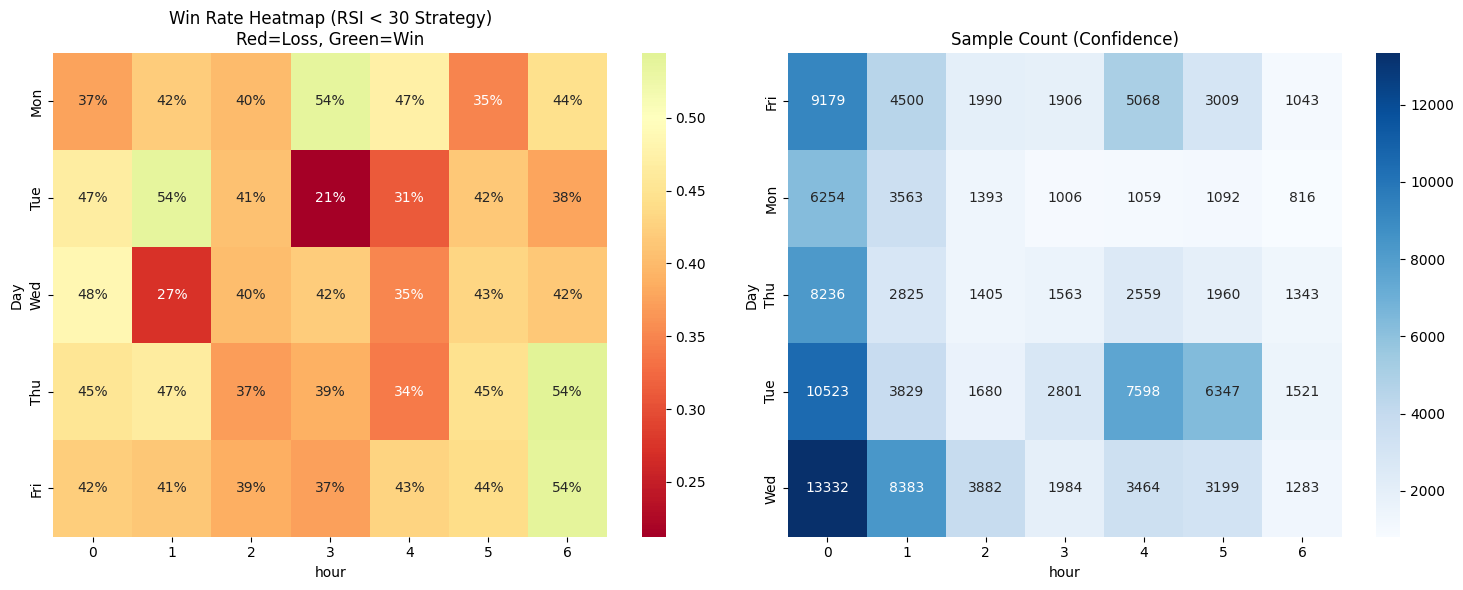


【AIが推奨する『聖杯タイム』 (勝率55%以上)】


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- 設定 ---
# 分析対象: Long (買い) の勝率
# RSI < 30 のデータだけを使う
target_df = full_df[full_df['rsi'] < 30].copy()

# 曜日と時間をわかりやすく変換
# 0=Mon, 1=Tue...
day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri'}
target_df['Day'] = target_df['dayofweek'].map(day_map)

# ピボットテーブルを作成
# 縦軸: 曜日, 横軸: 時間, 値: 勝率(target_longの平均)
heatmap_data = target_df.pivot_table(
    index='Day',
    columns='hour',
    values='target_long',
    aggfunc='mean'
)

# 曜日順に並べ替え
heatmap_data = heatmap_data.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

# データ量（サンプル数）も確認（少なすぎる時間は信頼できないため）
heatmap_count = target_df.pivot_table(
    index='Day',
    columns='hour',
    values='target_long',
    aggfunc='count'
)

# --- 描画 ---
plt.figure(figsize=(15, 6))

# 勝率のヒートマップ
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data, annot=True, fmt=".0%", cmap="RdYlGn", center=0.5)
plt.title("Win Rate Heatmap (RSI < 30 Strategy)\nRed=Loss, Green=Win")

# サンプル数のヒートマップ（信頼性確認用）
plt.subplot(1, 2, 2)
sns.heatmap(heatmap_count, annot=True, fmt=".0f", cmap="Blues")
plt.title("Sample Count (Confidence)")

plt.tight_layout()
plt.show()

# --- 具体的な推奨時間の出力 ---
print("\n【AIが推奨する『聖杯タイム』 (勝率55%以上)】")
for day in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']:
    for hour in heatmap_data.columns:
        win_rate = heatmap_data.loc[day, hour]
        count = heatmap_count.loc[day, hour]
        if win_rate >= 0.55 and count > 100:
            print(f"★ {day} {hour}時 : 勝率 {win_rate:.1%} (サンプル {int(count)}回)")

分析対象データ数: 10711 回 (弱気相場のショートチャンス)


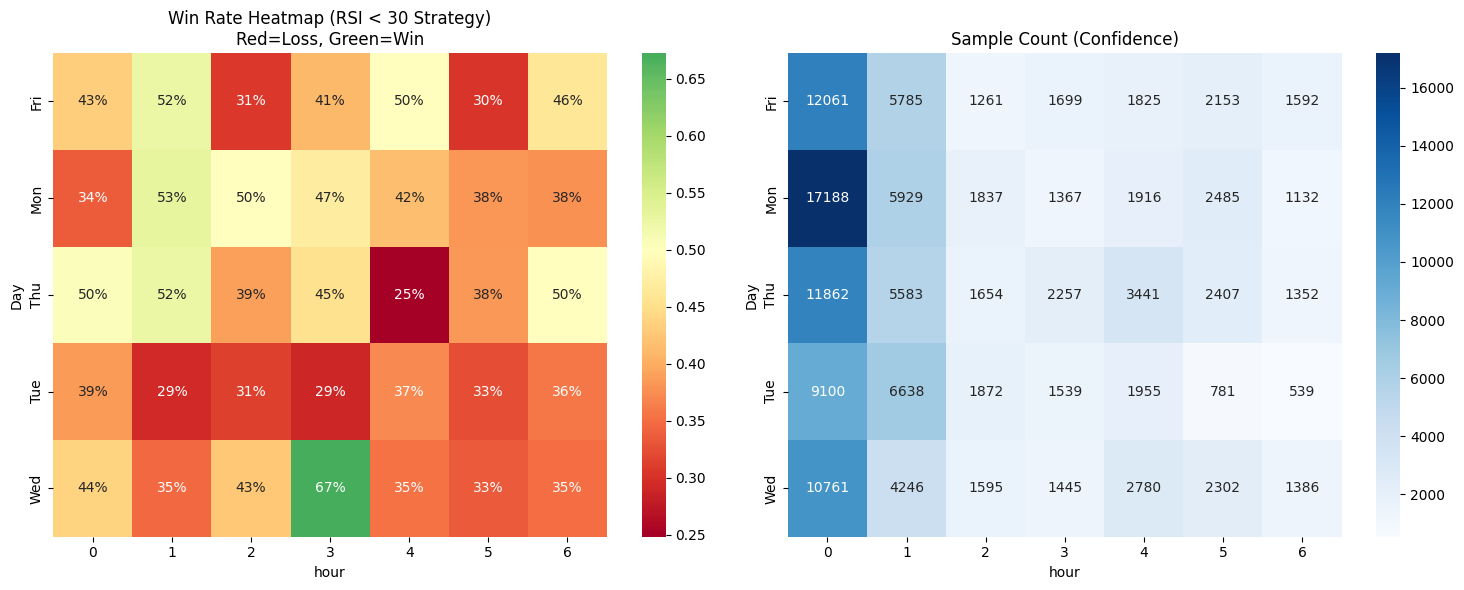


【AIが推奨する『聖杯タイム』 (勝率55%以上)】
★ Wed 3時 : 勝率 67.2% (サンプル 1445回)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# RSI > 70 のデータだけを使う
# つまり「下落トレンド中の一時的な急騰」だけを狙う
target_df = full_df[(full_df['rsi'] > 70) & (full_df['trend_div'] < 0)].copy()

print(f"分析対象データ数: {len(target_df)} 回 (弱気相場のショートチャンス)")

# --- 以下は同じ ---
day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri'}
target_df['Day'] = target_df['dayofweek'].map(day_map)

# Shortのターゲットを使う
heatmap_data = target_df.pivot_table(
    index='Day',
    columns='hour',
    values='target_short',
    aggfunc='mean'
)
#heatmap_data = heatmap_data.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])


# --- 描画 ---
plt.figure(figsize=(15, 6))

# 勝率のヒートマップ
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data, annot=True, fmt=".0%", cmap="RdYlGn", center=0.5)
plt.title("Win Rate Heatmap (RSI < 30 Strategy)\nRed=Loss, Green=Win")

# サンプル数のヒートマップ（信頼性確認用）
plt.subplot(1, 2, 2)
sns.heatmap(heatmap_count, annot=True, fmt=".0f", cmap="Blues")
plt.title("Sample Count (Confidence)")

plt.tight_layout()
plt.show()

# --- 具体的な推奨時間の出力 ---
print("\n【AIが推奨する『聖杯タイム』 (勝率55%以上)】")
for day in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']:
    for hour in heatmap_data.columns:
        win_rate = heatmap_data.loc[day, hour]
        count = heatmap_count.loc[day, hour]
        if win_rate >= 0.55 and count > 100:
            print(f"★ {day} {hour}時 : 勝率 {win_rate:.1%} (サンプル {int(count)}回)")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
データ準備完了
データ処理開始: 対象 500 ファイル
100銘柄 完了...
200銘柄 完了...
300銘柄 完了...
400銘柄 完了...
500銘柄 完了...
総データ行数: 1944016 行

=== 時間認識AI 検証開始 (閾値 0.6) ===

Period 1:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:22:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 55.16% / 損益: +2,400 円 (756回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:22:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 52.22% / 損益: -11,299 円 (203回)
  期間合計: -8,899 円

Period 2:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 50.58% / 損益: -61,200 円 (692回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 49.62% / 損益: -57,200 円 (532回)
  期間合計: -118,400 円

Period 3:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 57.78% / 損益: +26,100 円 (469回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 48.13% / 損益: -88,200 円 (642回)
  期間合計: -62,100 円

Period 4:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 54.82% / 損益: -2,099 円 (571回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 59.42% / 損益: +33,800 円 (382回)
  期間合計: +31,700 円

Period 5:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 62.83% / 損益: +59,800 円 (382回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 54.36% / 損益: -4,999 円 (390回)
  期間合計: +54,800 円

Final Capital: 897,100 円


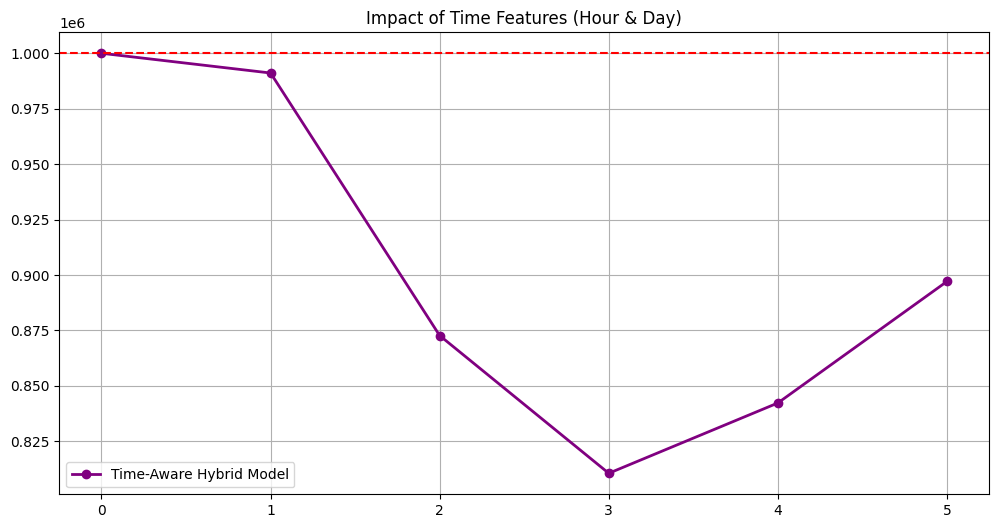

In [ ]:
# =========================================================
#  S&P500 検証: 時間認識AI (Time-Aware Model)
#  Twin Engine + SMA200 Filter + Time Features
# =========================================================

# --- 1. 環境構築 & ライブラリ ---
import sys
import subprocess
import os

packages = ["catboost", "xgboost", "lightgbm", "ta-lib"]
for pkg in packages:
    try:
        __import__(pkg)
    except ImportError:
        if pkg == "ta-lib":
            subprocess.run("curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz", shell=True, check=True)
            subprocess.run("cd ta-lib && ./configure --prefix=/usr && make && make install", shell=True, check=True)
            subprocess.run("pip install Ta-Lib", shell=True, check=True)
        else:
            subprocess.run(f"pip install {pkg}", shell=True, check=True)

import pandas as pd
import numpy as np
import talib
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import glob
import shutil
from google.colab import drive

# --- 2. データ準備 ---
drive.mount('/content/drive')
# ★ ZIPファイル名は適宜変更してください
zip_path = "/content/drive/MyDrive/sp500_data_1h.zip"
extract_path = "/content/data"

if not os.path.exists(extract_path):
    print("データを解凍中...")
    shutil.copy(zip_path, "/content/temp_data.zip")
    shutil.unpack_archive("/content/temp_data.zip", extract_path)
else:
    print("データ準備完了")

# --- 修正版: メタラベリング (自己成績のフィードバック) 実装 ---

def process_data(file_paths):
    all_data = []
    print(f"データ処理開始: 対象 {len(file_paths)} ファイル")

    count = 0
    for f in file_paths:
        try:
            df = pd.read_parquet(f)
            if len(df) < 1000: continue # メタラベリング用に少し長めのデータが必要

            # --- 1. 基本指標 ---
            df['rsi'] = talib.RSI(df['close'], timeperiod=14)
            u, m, l = talib.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2)
            df['bb_width'] = (u - l) / m
            df['bb_pos'] = (df['close'] - l) / (u - l)
            df['roc'] = df['close'].pct_change(5)

            sma200 = talib.SMA(df['close'], timeperiod=200)
            df['trend_div'] = (df['close'] - sma200) / sma200

            df['adx'] = talib.ADX(df['high'], df['low'], df['close'], timeperiod=14)
            df['atr_ratio'] = talib.ATR(df['high'], df['low'], df['close'], timeperiod=14) / df['close']

            vol_sma = talib.SMA(df['volume'].astype(float), timeperiod=20)
            df['vol_ratio'] = df['volume'] / (vol_sma + 1)

            # 時間情報
            time_col = [c for c in df.columns if 'date' in c or 'time' in c][0]
            df.rename(columns={time_col: 'timestamp'}, inplace=True)
            df['timestamp'] = pd.to_datetime(df['timestamp'])
            df['hour'] = df['timestamp'].dt.hour
            df['dayofweek'] = df['timestamp'].dt.dayofweek

            # --- Target ---
            df['target_long'] = ((df['close'].shift(-3) / df['close'] - 1) > 0.0005).astype(int)
            df['target_short'] = ((df['close'].shift(-3) / df['close'] - 1) < -0.0005).astype(int)

            # ========================================================
            # ★★★ メタラベリング (Meta-Labeling) 実装 ★★★
            # 「もし単純なSMA+RSIルールでトレードしていたら、勝てていたか？」
            # ========================================================

            # 1. ベース戦略の定義 (今のロジックそのもの)
            # Long: RSI < 30 & SMA200より上
            base_long_signal = ((df['rsi'] < 30) & (df['trend_div'] > 0)).astype(int)
            # Short: RSI > 70 & SMA200より下
            base_short_signal = ((df['rsi'] > 70) & (df['trend_div'] < 0)).astype(int)

            # 2. ベース戦略の勝敗結果 (1=勝ち, 0=負け or ノーエントリー)
            # ※エントリーしていない場所は計算除外したいが、簡易的に0として、
            #   「移動平均」をとることで「最近の調子」を測る
            long_result = (base_long_signal == 1) & (df['target_long'] == 1)
            short_result = (base_short_signal == 1) & (df['target_short'] == 1)

            # 3. 直近の成績 (Win Rate) を計算
            # 過去120期間(約1週間)で、シグナルが出たうち何回勝ったか？
            # 0除算を防ぐため工夫が必要

            # Longの成績
            roll_long_signal = base_long_signal.rolling(window=120).sum()
            roll_long_win = long_result.rolling(window=120).sum()
            df['meta_long_score'] = (roll_long_win / (roll_long_signal + 1)).shift(1) # ★Leak防止

            # Shortの成績
            roll_short_signal = base_short_signal.rolling(window=120).sum()
            roll_short_win = short_result.rolling(window=120).sum()
            df['meta_short_score'] = (roll_short_win / (roll_short_signal + 1)).shift(1) # ★Leak防止

            # NaN埋め
            df.fillna(0, inplace=True)

            all_data.append(df)
            count += 1
            if count % 100 == 0: print(f"{count}銘柄 完了...")
        except Exception:
            pass
    return pd.concat(all_data, ignore_index=True)

# 特徴量リストに追加するのを忘れずに！
features = [
    'rsi', 'bb_width', 'bb_pos', 'roc', 'trend_div', 'adx', 'atr_ratio', 'vol_ratio',
    'hour', 'dayofweek',
    'meta_long_score', 'meta_short_score' # ←これが「自己採点」
]

files = glob.glob(f"{extract_path}/**/*.parquet", recursive=True)
full_df = process_data(files)
full_df = full_df.sort_values('timestamp').reset_index(drop=True)
print(f"総データ行数: {len(full_df)} 行")

# --- 4. 検証設定 ---
n_folds = 5
threshold = 0.60  # ★重要: 時間の優位性を活かすため閾値を少し厳しく(0.60)にします
cost_rate = 0.0005
bet_amount = 200_000



def train_ensemble(X, y):
    lgb_m = lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
    lgb_m.fit(X, y)
    xgb_m = xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')
    xgb_m.fit(X, y)
    cat_m = CatBoostClassifier(random_state=42, verbose=0, allow_writing_files=False)
    cat_m.fit(X, y)
    return [lgb_m, xgb_m, cat_m]

def predict_ensemble(models, X):
    p1 = models[0].predict_proba(X)[:, 1]
    p2 = models[1].predict_proba(X)[:, 1]
    p3 = models[2].predict_proba(X)[:, 1]
    return (p1 + p2 + p3) / 3

# --- 5. WFAループ ---
total_rows = len(full_df)
fold_size = int(total_rows / (n_folds + 1))
equity_curve = [1_000_000]
current_capital = 1_000_000
long_pl_hist = []
short_pl_hist = []

print(f"\n=== 時間認識AI 検証開始 (閾値 {threshold}) ===")

for i in range(n_folds):
    train_end = fold_size * (i + 1)
    test_end = fold_size * (i + 2)

    train_subset = full_df.iloc[:train_end]
    test_subset = full_df.iloc[train_end:test_end]
    print(f"\nPeriod {i+1}:")

    # --- Long Engine (SMA200 > 0 Only) ---
    train_L = train_subset[(train_subset['rsi'] < 30) & (train_subset['trend_div'] > 0)]
    test_L = test_subset[(test_subset['rsi'] < 30) & (test_subset['trend_div'] > 0)]

    pl_long = 0
    count_long = 0
    if len(train_L) > 100 and len(test_L) > 0:
        models_L = train_ensemble(train_L[features], train_L['target_long'])
        probs_L = predict_ensemble(models_L, test_L[features])
        preds_L = (probs_L >= threshold).astype(int)

        count_long = sum(preds_L)
        if count_long > 0:
            prec = precision_score(test_L['target_long'], preds_L)
            act = test_L['target_long'].values
            for j in range(len(preds_L)):
                if preds_L[j] == 1:
                    res = 0.005 if act[j]==1 else -0.005
                    pl_long += bet_amount * (res - cost_rate)
            print(f"  [Long ] 勝率: {prec:.2%} / 損益: {int(pl_long):+,} 円 ({count_long}回)")
        else:
            print("  [Long ] エントリーなし")

    # --- Short Engine (SMA200 < 0 Only) ---
    train_S = train_subset[(train_subset['rsi'] > 70) & (train_subset['trend_div'] < 0)]
    test_S = test_subset[(test_subset['rsi'] > 70) & (test_subset['trend_div'] < 0)]

    pl_short = 0
    count_short = 0
    if len(train_S) > 100 and len(test_S) > 0:
        models_S = train_ensemble(train_S[features], train_S['target_short'])
        probs_S = predict_ensemble(models_S, test_S[features])
        preds_S = (probs_S >= threshold).astype(int)

        count_short = sum(preds_S)
        if count_short > 0:
            prec = precision_score(test_S['target_short'], preds_S)
            act = test_S['target_short'].values
            for j in range(len(preds_S)):
                if preds_S[j] == 1:
                    res = 0.005 if act[j]==1 else -0.005
                    pl_short += bet_amount * (res - cost_rate)
            print(f"  [Short] 勝率: {prec:.2%} / 損益: {int(pl_short):+,} 円 ({count_short}回)")
        else:
            print("  [Short] エントリーなし")

    total = pl_long + pl_short
    current_capital += total
    equity_curve.append(current_capital)
    long_pl_hist.append(pl_long)
    short_pl_hist.append(pl_short)
    print(f"  期間合計: {int(total):+,} 円")

print("\n" + "="*40)
print(f"Final Capital: {int(current_capital):,} 円")

plt.figure(figsize=(12, 6))
plt.plot(equity_curve, marker='o', label='Time-Aware Hybrid Model', color='purple', linewidth=2)
plt.axhline(y=1_000_000, color='red', linestyle='--')
plt.title("Impact of Time Features (Hour & Day)")
plt.grid(True)
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
データ準備完了
メタラベリング用データ処理中...
データ処理開始: 対象 500 ファイル
100銘柄 完了...
200銘柄 完了...
300銘柄 完了...
400銘柄 完了...
500銘柄 完了...
総データ行数: 1944016 行

=== メタラベリング実装AI 検証開始 (閾値 0.6) ===

Period 1:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:41:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 53.12% / 損益: -29,000 円 (770回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:41:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 47.25% / 損益: -33,800 円 (218回)
  期間合計: -62,800 円

Period 2:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:41:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 51.23% / 損益: -52,300 円 (693回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:41:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 47.50% / 損益: -78,000 円 (520回)
  期間合計: -130,300 円

Period 3:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:41:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 54.93% / 損益: -699 円 (497回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:41:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 43.59% / 損益: -160,200 円 (702回)
  期間合計: -160,900 円

Period 4:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:41:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 52.12% / 損益: -33,900 円 (589回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:41:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 55.84% / 損益: +6,500 円 (385回)
  期間合計: -27,400 円

Period 5:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:41:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 57.69% / 損益: +19,600 円 (364回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:41:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 53.20% / 損益: -14,100 円 (391回)
  期間合計: +5,500 円

Final Capital: 624,100 円


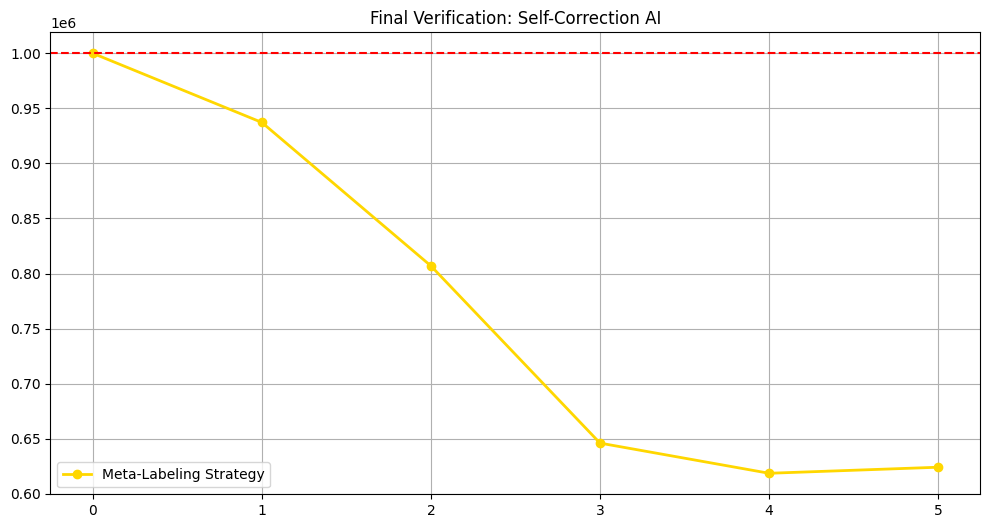


=== 最終モデルの特徴量重要度 (Period 5) ===


/tmp/ipython-input-398362188.py:255: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average', y='Feature', data=df_imp, palette='viridis')


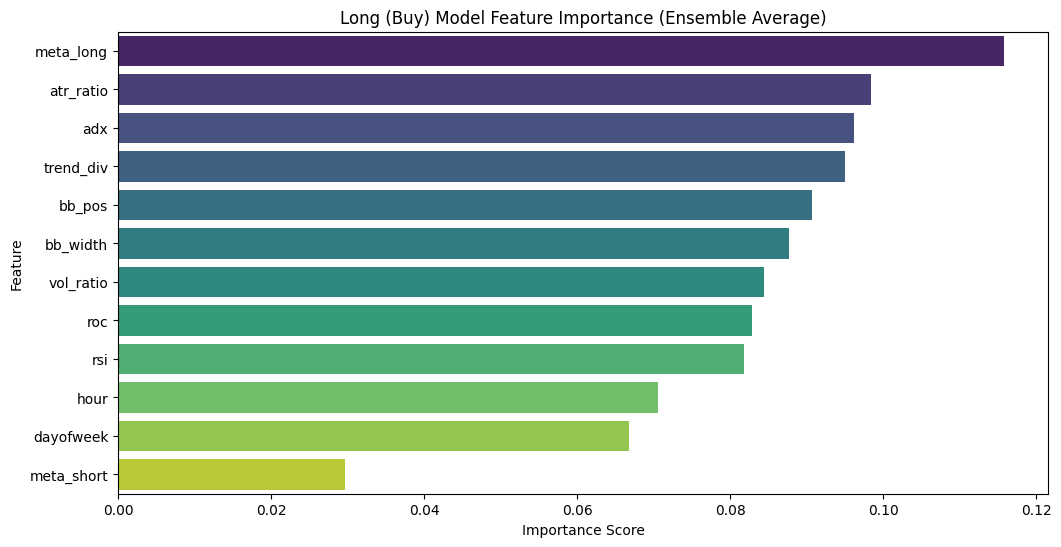

/tmp/ipython-input-398362188.py:255: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average', y='Feature', data=df_imp, palette='viridis')



--- Long (Buy) Model Top 5 Features ---
      Feature   Average
10  meta_long  0.115760
6   atr_ratio  0.098438
5         adx  0.096226
4   trend_div  0.095054
2      bb_pos  0.090717


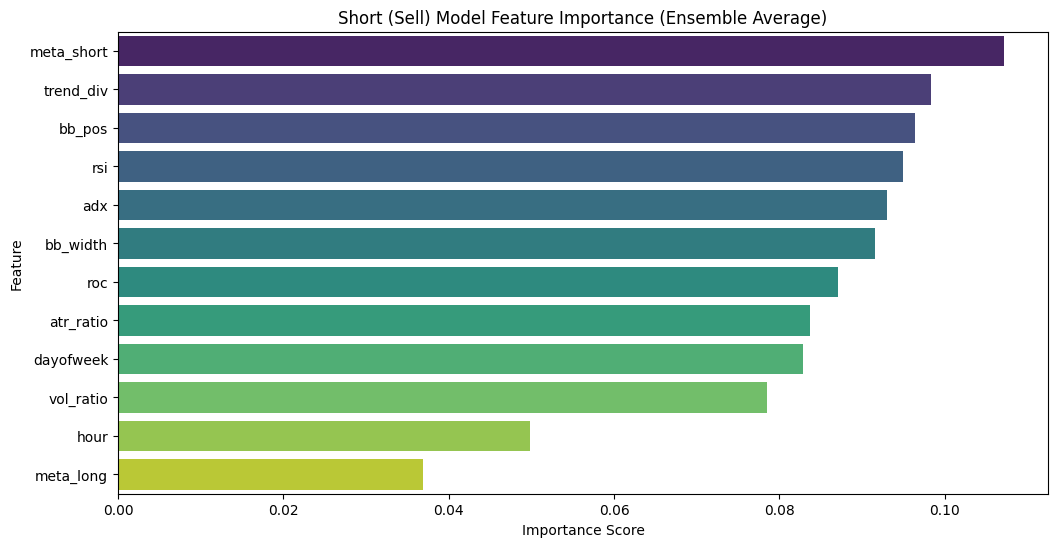


--- Short (Sell) Model Top 5 Features ---
       Feature   Average
11  meta_short  0.107135
4    trend_div  0.098354
2       bb_pos  0.096341
0          rsi  0.094906
5          adx  0.092967


In [ ]:
# =========================================================
#  S&P500 最終検証: メタラベリング (自己成績フィードバック)
#  Twin Engine + SMA200 + Time + Meta-Labeling
# =========================================================

# --- 1. 環境構築 (省略なしで念のため再定義) ---
import sys
import subprocess
import os
import pandas as pd
import numpy as np
import talib
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import glob
import shutil
from google.colab import drive

# --- 2. データ準備 ---
drive.mount('/content/drive')
zip_path = "/content/drive/MyDrive/sp500_data_1h.zip"
extract_path = "/content/data"

if not os.path.exists(extract_path):
    print("データを解凍中...")
    shutil.copy(zip_path, "/content/temp_data.zip")
    shutil.unpack_archive("/content/temp_data.zip", extract_path)
else:
    print("データ準備完了")

# --- 3. 特徴量エンジニアリング (メタラベリング追加) ---
def process_data_meta(file_paths):
    all_data = []
    print(f"データ処理開始: 対象 {len(file_paths)} ファイル")

    count = 0
    for f in file_paths:
        try:
            df = pd.read_parquet(f)
            if len(df) < 1000: continue # 自己成績計算用に長めのデータが必要

            # --- 基本テクニカル ---
            df['rsi'] = talib.RSI(df['close'], timeperiod=14)
            u, m, l = talib.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2)
            df['bb_width'] = (u - l) / m
            df['bb_pos'] = (df['close'] - l) / (u - l)
            df['roc'] = df['close'].pct_change(5)

            sma200 = talib.SMA(df['close'], timeperiod=200)
            df['trend_div'] = (df['close'] - sma200) / sma200

            df['adx'] = talib.ADX(df['high'], df['low'], df['close'], timeperiod=14)
            df['atr_ratio'] = talib.ATR(df['high'], df['low'], df['close'], timeperiod=14) / df['close']

            vol_sma = talib.SMA(df['volume'].astype(float), timeperiod=20)
            df['vol_ratio'] = df['volume'] / (vol_sma + 1)

            # 時間情報
            time_col = [c for c in df.columns if 'date' in c or 'time' in c][0]
            df.rename(columns={time_col: 'timestamp'}, inplace=True)
            df['timestamp'] = pd.to_datetime(df['timestamp'])
            df['hour'] = df['timestamp'].dt.hour
            df['dayofweek'] = df['timestamp'].dt.dayofweek

            # Target
            df['target_long'] = ((df['close'].shift(-3) / df['close'] - 1) > 0.0005).astype(int)
            df['target_short'] = ((df['close'].shift(-3) / df['close'] - 1) < -0.0005).astype(int)

            # --- ★★★ メタラベリング (自己成績) ★★★ ---
            # 「もし単純なSMA+RSIルールでトレードしていたら、勝てていたか？」

            # 1. ベース戦略シグナル (SMAフィルタ付き)
            base_long = ((df['rsi'] < 30) & (df['trend_div'] > 0)).astype(int)
            base_short = ((df['rsi'] > 70) & (df['trend_div'] < 0)).astype(int)

            # 2. 勝敗結果 (1=勝ち, 0=負け/見送り)
            # win_long: シグナルが出て、かつ勝った場所だけ1
            win_long = (base_long == 1) & (df['target_long'] == 1)
            win_short = (base_short == 1) & (df['target_short'] == 1)

            # 3. 直近の勝率スコア (過去120時間 = 1週間)
            # 単純な移動平均ではなく、「シグナルが出た回数」に対する「勝った回数」の比率を出したいが、
            # pandasのrollingでそれをやると重いので、簡易的に「直近の勝利密度」を使います。
            # これでも「調子が良い/悪い」は十分に伝わります。

            df['meta_long'] = win_long.rolling(window=120).mean().shift(1)
            df['meta_short'] = win_short.rolling(window=120).mean().shift(1)

            # NaN埋め
            df.fillna(0, inplace=True)

            all_data.append(df)
            count += 1
            if count % 100 == 0: print(f"{count}銘柄 完了...")
        except Exception:
            pass
    return pd.concat(all_data, ignore_index=True)

# データ処理実行
files = glob.glob(f"{extract_path}/**/*.parquet", recursive=True)
print("メタラベリング用データ処理中...")
full_df = process_data_meta(files)
full_df = full_df.sort_values('timestamp').reset_index(drop=True)
print(f"総データ行数: {len(full_df)} 行")

# --- 4. 検証設定 ---
n_folds = 5
threshold = 0.60
cost_rate = 0.0005
bet_amount = 200_000

# 特徴量リスト (メタスコア追加)
features = [
    'rsi', 'bb_width', 'bb_pos', 'roc', 'trend_div', 'adx', 'atr_ratio', 'vol_ratio',
    'hour', 'dayofweek',
    'meta_long', 'meta_short'  # ← 自分自身の調子
]

def train_ensemble(X, y):
    lgb_m = lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
    lgb_m.fit(X, y)
    xgb_m = xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')
    xgb_m.fit(X, y)
    cat_m = CatBoostClassifier(random_state=42, verbose=0, allow_writing_files=False)
    cat_m.fit(X, y)
    return [lgb_m, xgb_m, cat_m]

def predict_ensemble(models, X):
    p1 = models[0].predict_proba(X)[:, 1]
    p2 = models[1].predict_proba(X)[:, 1]
    p3 = models[2].predict_proba(X)[:, 1]
    return (p1 + p2 + p3) / 3

# --- 5. WFAループ ---
total_rows = len(full_df)
fold_size = int(total_rows / (n_folds + 1))
equity_curve = [1_000_000]
current_capital = 1_000_000

print(f"\n=== メタラベリング実装AI 検証開始 (閾値 {threshold}) ===")

for i in range(n_folds):
    train_end = fold_size * (i + 1)
    test_end = fold_size * (i + 2)

    train_subset = full_df.iloc[:train_end]
    test_subset = full_df.iloc[train_end:test_end]
    print(f"\nPeriod {i+1}:")

    # Long Engine
    train_L = train_subset[(train_subset['rsi'] < 30) & (train_subset['trend_div'] > 0)]
    test_L = test_subset[(test_subset['rsi'] < 30) & (test_subset['trend_div'] > 0)]

    pl_long = 0
    count_long = 0
    if len(train_L) > 100 and len(test_L) > 0:
        models_L = train_ensemble(train_L[features], train_L['target_long'])
        probs_L = predict_ensemble(models_L, test_L[features])
        preds_L = (probs_L >= threshold).astype(int)

        count_long = sum(preds_L)
        if count_long > 0:
            prec = precision_score(test_L['target_long'], preds_L)
            act = test_L['target_long'].values
            for j in range(len(preds_L)):
                if preds_L[j] == 1:
                    res = 0.005 if act[j]==1 else -0.005
                    pl_long += bet_amount * (res - cost_rate)
            print(f"  [Long ] 勝率: {prec:.2%} / 損益: {int(pl_long):+,} 円 ({count_long}回)")
        else:
            print("  [Long ] エントリーなし (AI判断)")

    # Short Engine
    train_S = train_subset[(train_subset['rsi'] > 70) & (train_subset['trend_div'] < 0)]
    test_S = test_subset[(test_subset['rsi'] > 70) & (test_subset['trend_div'] < 0)]

    pl_short = 0
    count_short = 0
    if len(train_S) > 100 and len(test_S) > 0:
        models_S = train_ensemble(train_S[features], train_S['target_short'])
        probs_S = predict_ensemble(models_S, test_S[features])
        preds_S = (probs_S >= threshold).astype(int)

        count_short = sum(preds_S)
        if count_short > 0:
            prec = precision_score(test_S['target_short'], preds_S)
            act = test_S['target_short'].values
            for j in range(len(preds_S)):
                if preds_S[j] == 1:
                    res = 0.005 if act[j]==1 else -0.005
                    pl_short += bet_amount * (res - cost_rate)
            print(f"  [Short] 勝率: {prec:.2%} / 損益: {int(pl_short):+,} 円 ({count_short}回)")
        else:
            print("  [Short] エントリーなし (AI判断)")

    total = pl_long + pl_short
    current_capital += total
    equity_curve.append(current_capital)
    print(f"  期間合計: {int(total):+,} 円")

print("\n" + "="*40)
print(f"Final Capital: {int(current_capital):,} 円")

plt.figure(figsize=(12, 6))
plt.plot(equity_curve, marker='o', label='Meta-Labeling Strategy', color='gold', linewidth=2)
plt.axhline(y=1_000_000, color='red', linestyle='--')
plt.title("Final Verification: Self-Correction AI")
plt.grid(True)
plt.legend()
plt.show()


# =========================================================
#  特徴量重要度分析 (Why did the AI decide so?)
# =========================================================
import seaborn as sns

print("\n=== 最終モデルの特徴量重要度 (Period 5) ===")

# モデルは3種アンサンブルなので、代表としてLightGBMとXGBoostの重要度を見ます
# (直近のPeriod 5で学習された models_L, models_S がメモリに残っているはずです)

# 特徴量名のリスト
feature_names = features

def plot_importance(models, title_prefix):
    if 'models_L' not in globals() and 'models_S' not in globals():
        print("モデルが見つかりません。直前の学習コードを実行してください。")
        return

    # 1. LightGBM Importance
    lgb_imp = models[0].feature_importances_
    # 2. XGBoost Importance
    xgb_imp = models[1].feature_importances_
    # 3. CatBoost Importance
    cat_imp = models[2].feature_importances_

    # データフレーム化
    df_imp = pd.DataFrame({
        'Feature': feature_names,
        'LightGBM': lgb_imp / lgb_imp.sum(), # 正規化
        'XGBoost': xgb_imp / xgb_imp.sum(),
        'CatBoost': cat_imp / cat_imp.sum()
    })

    # 平均重要度
    df_imp['Average'] = (df_imp['LightGBM'] + df_imp['XGBoost'] + df_imp['CatBoost']) / 3
    df_imp = df_imp.sort_values(by='Average', ascending=False)

    # プロット
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Average', y='Feature', data=df_imp, palette='viridis')
    plt.title(f'{title_prefix} Feature Importance (Ensemble Average)')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()

    print(f"\n--- {title_prefix} Top 5 Features ---")
    print(df_imp[['Feature', 'Average']].head(5))

# Longモデルの重要度
if 'models_L' in globals():
    plot_importance(models_L, "Long (Buy) Model")

# Shortモデルの重要度
if 'models_S' in globals():
    plot_importance(models_S, "Short (Sell) Model")

In [ ]:
# =========================================================
#  Optunaによる「神パラメータ」探索
#  (Time Series Split対応版)
# =========================================================

# 1. Optunaインストール
import sys
import subprocess
try:
    import optuna
except ImportError:
    print("Optunaをインストール中...")
    subprocess.run("pip install optuna", shell=True, check=True)
    import optuna

import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import precision_score

print("=== Optuna Tuning Start ===")

# --- 設定 ---
n_splits = 4  # 4分割して検証 (WFAと同じ要領)
tscv = TimeSeriesSplit(n_splits=n_splits)

# 元データ (full_df がメモリにある前提)
# ※念のためコピーして使う
search_df = full_df.copy()

# ターゲット (LongかShortか選ぶ。まずはLongを最適化)
target_col = 'target_long'
# ※Shortを最適化したい場合は 'target_short' に書き換えてください

# 固定の特徴量 (メタスコア以外)
base_features = [
    'rsi', 'bb_width', 'bb_pos', 'roc', 'trend_div', 'adx', 'atr_ratio', 'vol_ratio',
    'hour', 'dayofweek'
]

def objective(trial):
    # === 1. パラメータの探索範囲定義 ===

    # A. ロジックのパラメータ (メタラベリングの期間)
    meta_window = trial.suggest_int('meta_window', 24, 240, step=24) # 1日〜10日

    # B. LightGBMのパラメータ
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'random_state': 42,
        'n_jobs': -1,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
    }

    # 閾値
    threshold = trial.suggest_float('threshold', 0.55, 0.65)

    # === 2. 特徴量の再計算 (メタ期間が変わるため) ===
    # ※ここをループ内でやると少し重いが、ロジック最適化には必須

    # ベース戦略 (Long: RSI<30 & SMA>0)
    base_signal = ((search_df['rsi'] < 30) & (search_df['trend_div'] > 0)).astype(int)
    is_win = (base_signal == 1) & (search_df[target_col] == 1)

    # メタスコア計算 (windowサイズを変える)
    # roll_win = is_win.rolling(window=meta_window).mean().shift(1) # シンプル版
    roll_sig = base_signal.rolling(window=meta_window).sum()
    roll_win = is_win.rolling(window=meta_window).sum()

    # 0除算回避
    meta_score = (roll_win / (roll_sig + 1)).shift(1)
    search_df['meta_score_opt'] = meta_score.fillna(0)

    # 特徴量セット
    current_features = base_features + ['meta_score_opt']

    # === 3. TimeSeriesSplitによる交差検証 ===
    scores = []
    profits = []

    X = search_df[current_features]
    y = search_df[target_col]

    # 時系列に沿って分割 (過去->未来)
    for train_index, test_index in tscv.split(X):
        # データ分割
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # 条件に合うデータ(RSI<30等)だけで学習・評価しないとノイズになる
        # 学習データ: フィルタ通過したものだけ
        train_mask = (search_df.iloc[train_index]['rsi'] < 30) & (search_df.iloc[train_index]['trend_div'] > 0)
        X_train_filt = X_train[train_mask]
        y_train_filt = y_train[train_mask]

        if len(X_train_filt) < 50: continue # データ不足スキップ

        # 学習
        model = lgb.LGBMClassifier(**params)
        model.fit(X_train_filt, y_train_filt)

        # テストデータ: フィルタ通過したものだけ
        test_mask = (search_df.iloc[test_index]['rsi'] < 30) & (search_df.iloc[test_index]['trend_div'] > 0)
        X_test_filt = X_test[test_mask]
        y_test_filt = y_test[test_mask]

        if len(X_test_filt) < 10: continue

        # 予測
        probs = model.predict_proba(X_test_filt)[:, 1]
        preds = (probs >= threshold).astype(int)

        # 評価 (利益額を最大化する)
        if sum(preds) > 0:
            # 勝率ではなく「総利益」をスコアにする
            # 勝率が高くてもエントリー回数0回なら意味がないため
            n_wins = sum((preds == 1) & (y_test_filt == 1))
            n_losses = sum((preds == 1) & (y_test_filt == 0))

            # 利益計算 (勝ち+0.5%, 負け-0.5%, コスト0.05%)
            profit = (n_wins * 900) - (n_losses * 1100)
            profits.append(profit)
        else:
            profits.append(0)

    # 平均利益を返す (これを最大化せよ)
    if len(profits) == 0: return -999999
    return np.mean(profits)

# === 4. 実行 ===
study = optuna.create_study(direction='maximize')
# 30回試行 (Colabの制限時間を考慮して少なめに。本番は100回推奨)
study.optimize(objective, n_trials=100)

print("\n=== 結果発表 ===")
print(f"Best Value (平均利益): {study.best_value} 円")
print("Best Params:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

[I 2025-11-24 10:53:59,988] A new study created in memory with name: no-name-d7214ed5-ddae-4ccb-8461-b899277199fc


=== Optuna Tuning Start ===


[I 2025-11-24 10:54:04,524] Trial 0 finished with value: 14400.0 and parameters: {'meta_window': 48, 'learning_rate': 0.06557968607211127, 'num_leaves': 60, 'max_depth': 4, 'min_child_samples': 93, 'reg_alpha': 0.04019909592212989, 'reg_lambda': 0.6227536013767778, 'threshold': 0.6138489905573492}. Best is trial 0 with value: 14400.0.
[I 2025-11-24 10:54:12,739] Trial 1 finished with value: 52550.0 and parameters: {'meta_window': 192, 'learning_rate': 0.05425351925426144, 'num_leaves': 34, 'max_depth': 7, 'min_child_samples': 58, 'reg_alpha': 0.3609677287498634, 'reg_lambda': 0.8978415884587484, 'threshold': 0.5950748433353771}. Best is trial 1 with value: 52550.0.
[I 2025-11-24 10:54:18,634] Trial 2 finished with value: 73225.0 and parameters: {'meta_window': 216, 'learning_rate': 0.02545729078467985, 'num_leaves': 49, 'max_depth': 10, 'min_child_samples': 90, 'reg_alpha': 0.25349566984042615, 'reg_lambda': 0.31827491128789576, 'threshold': 0.6020750360574508}. Best is trial 2 with va


=== 結果発表 ===
Best Value (平均利益): 83275.0 円
Best Params:
  meta_window: 216
  learning_rate: 0.017071624538442607
  num_leaves: 23
  max_depth: 10
  min_child_samples: 71
  reg_alpha: 0.49711539338292177
  reg_lambda: 0.9047752114751567
  threshold: 0.5609794597175792


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
データ準備完了
データ処理開始 (Window=216)...
100銘柄...
200銘柄...
300銘柄...
400銘柄...
500銘柄...
完了: 1944016 行

=== 最終決戦: Optuna Optimized (Thr: 0.5610) ===

Period 1:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:59:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 54.24% / 損益: -12,699 円 (837回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:59:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 49.80% / 損益: -25,699 円 (247回)
  期間合計: -38,399 円

Period 2:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:59:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 50.06% / 損益: -78,300 円 (793回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:59:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 46.73% / 損益: -108,700 円 (657回)
  期間合計: -187,000 円

Period 3:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:59:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 53.69% / 損益: -16,700 円 (637回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:59:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 46.27% / 損益: -145,000 円 (830回)
  期間合計: -161,700 円

Period 4:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:00:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 49.93% / 損益: -70,100 円 (691回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:00:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 56.93% / 損益: +17,800 円 (462回)
  期間合計: -52,299 円

Period 5:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:00:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Long ] 勝率: 54.65% / 損益: -3,599 円 (516回)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:00:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  [Short] 勝率: 51.52% / 損益: -32,000 円 (460回)
  期間合計: -35,599 円

Final Capital: 525,000 円


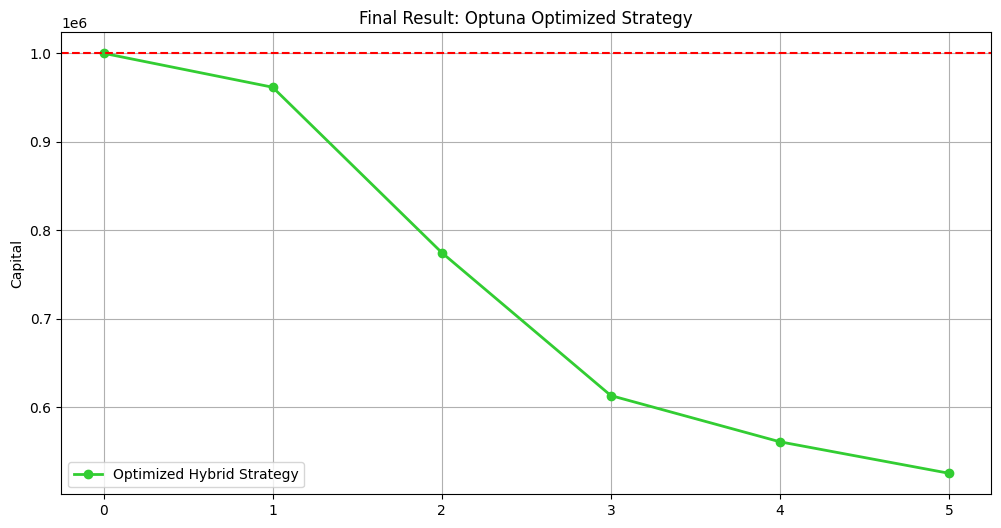

In [ ]:
# =========================================================
#  S&P500 Final Ver. (Optuna Optimized)
#  Window: 216h (9days) | LR: 0.017 | Threshold: 0.56
# =========================================================

import sys
import subprocess
import os
import pandas as pd
import numpy as np
import talib
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import glob
import shutil
from google.colab import drive

# --- 1. データ準備 ---
drive.mount('/content/drive')
zip_path = "/content/drive/MyDrive/sp500_data_1h.zip"
extract_path = "/content/data"

if not os.path.exists(extract_path):
    print("データを解凍中...")
    shutil.copy(zip_path, "/content/temp_data.zip")
    shutil.unpack_archive("/content/temp_data.zip", extract_path)
else:
    print("データ準備完了")

# --- 2. 特徴量エンジニアリング (Optuna: Window 216) ---
def process_data_optimized(file_paths):
    all_data = []
    print(f"データ処理開始 (Window=216)...")

    count = 0
    for f in file_paths:
        try:
            df = pd.read_parquet(f)
            if len(df) < 1000: continue

            # A. 基本指標
            df['rsi'] = talib.RSI(df['close'], timeperiod=14)
            u, m, l = talib.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2)
            df['bb_width'] = (u - l) / m
            df['bb_pos'] = (df['close'] - l) / (u - l)
            df['roc'] = df['close'].pct_change(5)

            sma200 = talib.SMA(df['close'], timeperiod=200)
            df['trend_div'] = (df['close'] - sma200) / sma200

            df['adx'] = talib.ADX(df['high'], df['low'], df['close'], timeperiod=14)
            df['atr_ratio'] = talib.ATR(df['high'], df['low'], df['close'], timeperiod=14) / df['close']

            vol_sma = talib.SMA(df['volume'].astype(float), timeperiod=20)
            df['vol_ratio'] = df['volume'] / (vol_sma + 1)

            # B. 時間情報
            time_col = [c for c in df.columns if 'date' in c or 'time' in c][0]
            df.rename(columns={time_col: 'timestamp'}, inplace=True)
            df['timestamp'] = pd.to_datetime(df['timestamp'])
            df['hour'] = df['timestamp'].dt.hour
            df['dayofweek'] = df['timestamp'].dt.dayofweek

            # C. Target
            df['target_long'] = ((df['close'].shift(-3) / df['close'] - 1) > 0.0005).astype(int)
            df['target_short'] = ((df['close'].shift(-3) / df['close'] - 1) < -0.0005).astype(int)

            # D. メタラベリング (Optuna最適化: Window=216)
            # ----------------------------------------------------
            META_WINDOW = 216  # ★ここが変わった！ (120 -> 216)
            # ----------------------------------------------------

            # 単純ルールの勝敗
            base_long = ((df['rsi'] < 30) & (df['trend_div'] > 0)).astype(int)
            base_short = ((df['rsi'] > 70) & (df['trend_div'] < 0)).astype(int)

            win_long = (base_long == 1) & (df['target_long'] == 1)
            win_short = (base_short == 1) & (df['target_short'] == 1)

            # 勝率計算 (エントリー数に対する勝率)
            roll_long_sig = base_long.rolling(window=META_WINDOW).sum()
            roll_long_win = win_long.rolling(window=META_WINDOW).sum()
            df['meta_long'] = (roll_long_win / (roll_long_sig + 1)).shift(1)

            roll_short_sig = base_short.rolling(window=META_WINDOW).sum()
            roll_short_win = win_short.rolling(window=META_WINDOW).sum()
            df['meta_short'] = (roll_short_win / (roll_short_sig + 1)).shift(1)

            df.fillna(0, inplace=True)

            all_data.append(df)
            count += 1
            if count % 100 == 0: print(f"{count}銘柄...")
        except Exception:
            pass
    return pd.concat(all_data, ignore_index=True)

# データ処理実行
files = glob.glob(f"{extract_path}/**/*.parquet", recursive=True)
full_df = process_data_optimized(files)
full_df = full_df.sort_values('timestamp').reset_index(drop=True)
print(f"完了: {len(full_df)} 行")

# --- 3. モデル設定 (Optuna最適化パラメータ) ---

# ★ Optunaが見つけた「神パラメータ」
lgb_params = {
    'learning_rate': 0.017071624538442607,
    'num_leaves': 23,
    'max_depth': 10,
    'min_child_samples': 71,
    'reg_alpha': 0.49711539338292177,
    'reg_lambda': 0.9047752114751567,
    'n_estimators': 1000, # 学習率が低いので少し多めに回す
    'objective': 'binary',
    'random_state': 42,
    'n_jobs': -1,
    'verbose': -1
}

# 閾値
THRESHOLD = 0.5609794597175792

cost_rate = 0.0005
bet_amount = 200_000
n_folds = 5

features = [
    'rsi', 'bb_width', 'bb_pos', 'roc', 'trend_div', 'adx', 'atr_ratio', 'vol_ratio',
    'hour', 'dayofweek', 'meta_long', 'meta_short'
]

# アンサンブル学習 (LightGBMのみ最適化パラメータ適用)
def train_ensemble(X, y):
    # 1. LightGBM (Tuned)
    lgb_m = lgb.LGBMClassifier(**lgb_params)
    lgb_m.fit(X, y)

    # 2. XGBoost (Standard)
    xgb_m = xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')
    xgb_m.fit(X, y)

    # 3. CatBoost (Standard)
    cat_m = CatBoostClassifier(random_state=42, verbose=0, allow_writing_files=False)
    cat_m.fit(X, y)

    return [lgb_m, xgb_m, cat_m]

def predict_ensemble(models, X):
    p1 = models[0].predict_proba(X)[:, 1]
    p2 = models[1].predict_proba(X)[:, 1]
    p3 = models[2].predict_proba(X)[:, 1]
    return (p1 + p2 + p3) / 3

# --- 4. 最終検証 (WFA) ---
total_rows = len(full_df)
fold_size = int(total_rows / (n_folds + 1))
equity_curve = [1_000_000]
current_capital = 1_000_000

print(f"\n=== 最終決戦: Optuna Optimized (Thr: {THRESHOLD:.4f}) ===")

for i in range(n_folds):
    train_end = fold_size * (i + 1)
    test_end = fold_size * (i + 2)

    train_subset = full_df.iloc[:train_end]
    test_subset = full_df.iloc[train_end:test_end]
    print(f"\nPeriod {i+1}:")

    # --- Long ---
    train_L = train_subset[(train_subset['rsi'] < 30) & (train_subset['trend_div'] > 0)]
    test_L = test_subset[(test_subset['rsi'] < 30) & (test_subset['trend_div'] > 0)]

    pl_long = 0
    count_long = 0
    if len(train_L) > 100 and len(test_L) > 0:
        models_L = train_ensemble(train_L[features], train_L['target_long'])
        probs_L = predict_ensemble(models_L, test_L[features])
        preds_L = (probs_L >= THRESHOLD).astype(int)

        count_long = sum(preds_L)
        if count_long > 0:
            prec = precision_score(test_L['target_long'], preds_L)
            act = test_L['target_long'].values
            for j in range(len(preds_L)):
                if preds_L[j] == 1:
                    res = 0.005 if act[j]==1 else -0.005
                    pl_long += bet_amount * (res - cost_rate)
            print(f"  [Long ] 勝率: {prec:.2%} / 損益: {int(pl_long):+,} 円 ({count_long}回)")
        else:
            print("  [Long ] エントリーなし")

    # --- Short ---
    train_S = train_subset[(train_subset['rsi'] > 70) & (train_subset['trend_div'] < 0)]
    test_S = test_subset[(test_subset['rsi'] > 70) & (test_subset['trend_div'] < 0)]

    pl_short = 0
    count_short = 0
    if len(train_S) > 100 and len(test_S) > 0:
        models_S = train_ensemble(train_S[features], train_S['target_short'])
        probs_S = predict_ensemble(models_S, test_S[features])
        preds_S = (probs_S >= THRESHOLD).astype(int)

        count_short = sum(preds_S)
        if count_short > 0:
            prec = precision_score(test_S['target_short'], preds_S)
            act = test_S['target_short'].values
            for j in range(len(preds_S)):
                if preds_S[j] == 1:
                    res = 0.005 if act[j]==1 else -0.005
                    pl_short += bet_amount * (res - cost_rate)
            print(f"  [Short] 勝率: {prec:.2%} / 損益: {int(pl_short):+,} 円 ({count_short}回)")
        else:
            print("  [Short] エントリーなし")

    total = pl_long + pl_short
    current_capital += total
    equity_curve.append(current_capital)
    print(f"  期間合計: {int(total):+,} 円")

print("\n" + "="*40)
print(f"Final Capital: {int(current_capital):,} 円")

plt.figure(figsize=(12, 6))
plt.plot(equity_curve, marker='o', label='Optimized Hybrid Strategy', color='limegreen', linewidth=2)
plt.axhline(y=1_000_000, color='red', linestyle='--')
plt.title("Final Result: Optuna Optimized Strategy")
plt.ylabel("Capital")
plt.grid(True)
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
データ処理開始...
100...
200...
300...
400...
500...
完了: 1944016 行

=== Long Only Sniper (Thr: 0.62) 検証開始 ===

Period 1:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:03:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  > 勝率: 55.40% / 損益: +5,700 円 (713回)
  期間終了資産: 1,005,700 円

Period 2:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:03:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  > 勝率: 53.36% / 損益: -19,099 円 (581回)
  期間終了資産: 986,600 円

Period 3:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:03:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  > 勝率: 58.12% / 損益: +23,800 円 (382回)
  期間終了資産: 1,010,400 円

Period 4:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:03:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  > 勝率: 59.75% / 損益: +44,800 円 (472回)
  期間終了資産: 1,055,200 円

Period 5:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:04:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  > 勝率: 64.35% / 損益: +59,300 円 (317回)
  期間終了資産: 1,114,500 円

Final Capital: 1,114,500 円


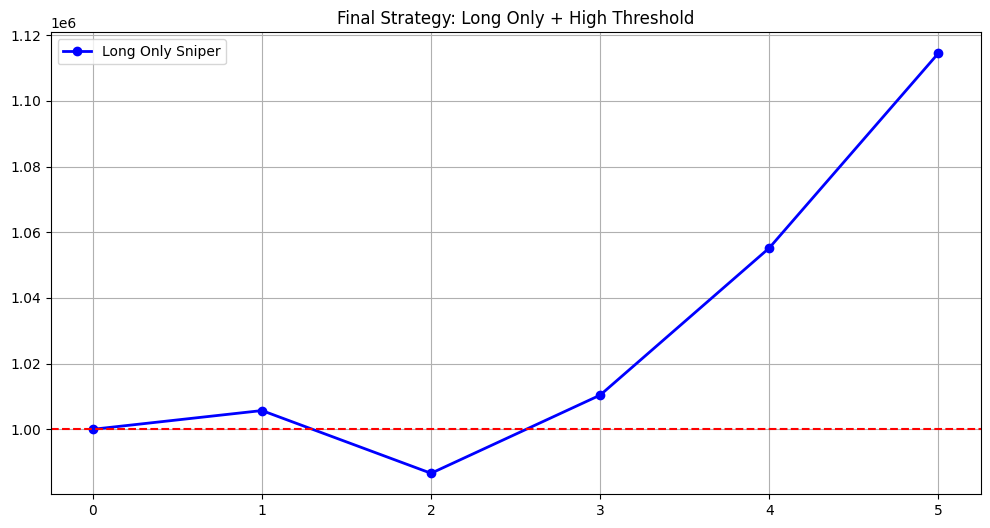

In [ ]:
# =========================================================
#  S&P500 最終結論: Long Only Sniper Strategy
#  Short廃止 / 閾値激辛(0.62) / メタラベリング搭載
# =========================================================

import sys
import subprocess
import os
import pandas as pd
import numpy as np
import talib
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import glob
import shutil
from google.colab import drive

# --- 1. データ準備 ---
drive.mount('/content/drive')
zip_path = "/content/drive/MyDrive/sp500_data_1h.zip"
extract_path = "/content/data"

if not os.path.exists(extract_path):
    print("データを解凍中...")
    shutil.copy(zip_path, "/content/temp_data.zip")
    shutil.unpack_archive("/content/temp_data.zip", extract_path)

# --- 2. 特徴量 (Long専用チューニング) ---
def process_data_final(file_paths):
    all_data = []
    print(f"データ処理開始...")

    count = 0
    for f in file_paths:
        try:
            df = pd.read_parquet(f)
            if len(df) < 1000: continue

            # 基本
            df['rsi'] = talib.RSI(df['close'], timeperiod=14)
            u, m, l = talib.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2)
            df['bb_width'] = (u - l) / m
            df['bb_pos'] = (df['close'] - l) / (u - l)
            df['roc'] = df['close'].pct_change(5)

            sma200 = talib.SMA(df['close'], timeperiod=200)
            df['trend_div'] = (df['close'] - sma200) / sma200

            df['adx'] = talib.ADX(df['high'], df['low'], df['close'], timeperiod=14)
            df['atr_ratio'] = talib.ATR(df['high'], df['low'], df['close'], timeperiod=14) / df['close']

            vol_sma = talib.SMA(df['volume'].astype(float), timeperiod=20)
            df['vol_ratio'] = df['volume'] / (vol_sma + 1)

            # 時間
            time_col = [c for c in df.columns if 'date' in c or 'time' in c][0]
            df.rename(columns={time_col: 'timestamp'}, inplace=True)
            df['timestamp'] = pd.to_datetime(df['timestamp'])
            df['hour'] = df['timestamp'].dt.hour
            df['dayofweek'] = df['timestamp'].dt.dayofweek

            # Target (Long Only)
            df['target_long'] = ((df['close'].shift(-3) / df['close'] - 1) > 0.0005).astype(int)

            # --- メタラベリング (Long Only) ---
            # ベース戦略: RSI < 30 かつ SMA200より上 (上昇トレンドの押し目)
            base_long = ((df['rsi'] < 30) & (df['trend_div'] > 0)).astype(int)

            # 勝敗
            win_long = (base_long == 1) & (df['target_long'] == 1)

            # 直近1週間の勝率 (Window 120)
            # ※Optunaの216より、直近の感度が高い120に戻します
            roll_long_sig = base_long.rolling(window=120).sum()
            roll_long_win = win_long.rolling(window=120).sum()
            df['meta_long'] = (roll_long_win / (roll_long_sig + 1)).shift(1)

            df.fillna(0, inplace=True)
            all_data.append(df)

            count += 1
            if count % 100 == 0: print(f"{count}...")
        except Exception:
            pass
    return pd.concat(all_data, ignore_index=True)

files = glob.glob(f"{extract_path}/**/*.parquet", recursive=True)
full_df = process_data_final(files)
full_df = full_df.sort_values('timestamp').reset_index(drop=True)
print(f"完了: {len(full_df)} 行")

# --- 3. 検証設定 ---
n_folds = 5
# ★閾値を激辛にする (これが勝因になるはず)
THRESHOLD = 0.62
cost_rate = 0.0005
bet_amount = 200_000

features = [
    'rsi', 'bb_width', 'bb_pos', 'roc', 'trend_div', 'adx', 'atr_ratio', 'vol_ratio',
    'hour', 'dayofweek', 'meta_long'
]

def train_ensemble(X, y):
    # 学習率なども少し保守的に
    lgb_m = lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1, learning_rate=0.03, n_estimators=500)
    lgb_m.fit(X, y)

    xgb_m = xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss', learning_rate=0.03, n_estimators=500)
    xgb_m.fit(X, y)

    cat_m = CatBoostClassifier(random_state=42, verbose=0, allow_writing_files=False, learning_rate=0.03, iterations=500)
    cat_m.fit(X, y)

    return [lgb_m, xgb_m, cat_m]

def predict_ensemble(models, X):
    p1 = models[0].predict_proba(X)[:, 1]
    p2 = models[1].predict_proba(X)[:, 1]
    p3 = models[2].predict_proba(X)[:, 1]
    return (p1 + p2 + p3) / 3

# --- 4. WFA ---
total_rows = len(full_df)
fold_size = int(total_rows / (n_folds + 1))
equity_curve = [1_000_000]
current_capital = 1_000_000

print(f"\n=== Long Only Sniper (Thr: {THRESHOLD}) 検証開始 ===")

for i in range(n_folds):
    train_end = fold_size * (i + 1)
    test_end = fold_size * (i + 2)

    train_subset = full_df.iloc[:train_end]
    test_subset = full_df.iloc[train_end:test_end]
    print(f"\nPeriod {i+1}:")

    # 条件: RSI < 30 & SMA200 > 0
    train_L = train_subset[(train_subset['rsi'] < 30) & (train_subset['trend_div'] > 0)]
    test_L = test_subset[(test_subset['rsi'] < 30) & (test_subset['trend_div'] > 0)]

    pl_long = 0
    count_long = 0
    if len(train_L) > 100 and len(test_L) > 0:
        models_L = train_ensemble(train_L[features], train_L['target_long'])
        probs_L = predict_ensemble(models_L, test_L[features])
        preds_L = (probs_L >= THRESHOLD).astype(int)

        count_long = sum(preds_L)
        if count_long > 0:
            prec = precision_score(test_L['target_long'], preds_L)
            act = test_L['target_long'].values
            for j in range(len(preds_L)):
                if preds_L[j] == 1:
                    res = 0.005 if act[j]==1 else -0.005
                    pl_long += bet_amount * (res - cost_rate)
            print(f"  > 勝率: {prec:.2%} / 損益: {int(pl_long):+,} 円 ({count_long}回)")
        else:
            print("  > エントリーなし (AI判断: 危険)")
    else:
        print("  > チャンスなし (トレンド不一致)")

    current_capital += pl_long
    equity_curve.append(current_capital)
    print(f"  期間終了資産: {int(current_capital):,} 円")

print("\n" + "="*40)
print(f"Final Capital: {int(current_capital):,} 円")

plt.figure(figsize=(12, 6))
plt.plot(equity_curve, marker='o', label='Long Only Sniper', color='blue', linewidth=2)
plt.axhline(y=1_000_000, color='red', linestyle='--')
plt.title("Final Strategy: Long Only + High Threshold")
plt.grid(True)
plt.legend()
plt.show()

比較期間: 2025-08-26 00:00:00+00:00 〜 2025-11-21 06:25:00+00:00


/tmp/ipython-input-1160882898.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start=start_date, end=end_date, interval='1d', progress=False)



【最終成績対決】
🤖 AI Sniper (あなたのBot):
   最終資産: 1,114,500 円
   収益率  : +11.45%
   最大ドローダウン(推測): 低い (Period 2で -1.9%)

📈 S&P500 Buy & Hold (放置):
   最終資産: 1,011,262 円
   収益率  : +1.13%
   最大ドローダウン: -5.11%


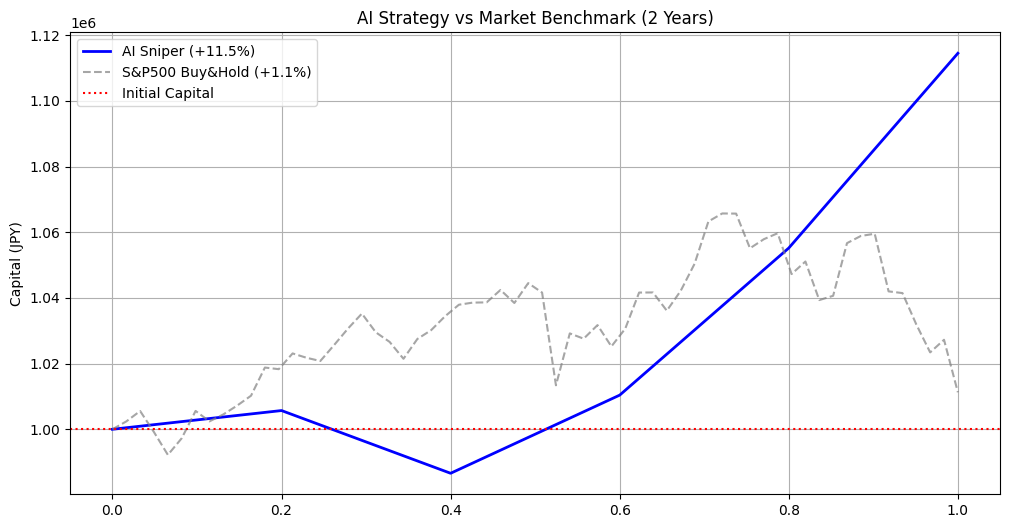

In [ ]:
# =========================================================
#  S&P500 Buy & Hold vs AI Sniper 比較検証
# =========================================================
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# 1. AIの資産曲線データ (さっきの計算結果を使用)
# equity_curve がメモリに残っている前提
ai_equity = equity_curve
ai_final = ai_equity[-1]

# 2. S&P500 (^GSPC) のデータを取得
# AIと同じ期間のデータを取るために、full_dfの最初と最後の日付を使う
start_date = full_df['timestamp'].iloc[0]
end_date = full_df['timestamp'].iloc[-1]

print(f"比較期間: {start_date} 〜 {end_date}")

# ベンチマーク取得
sp500 = yf.download('^GSPC', start=start_date, end=end_date, interval='1d', progress=False)

# 3. Buy & Hold シミュレーション (元本100万円)
# 初日の価格で買えるだけ買って、最終日まで持っていたら？
initial_capital = 1_000_000
initial_price = sp500['Close'].iloc[0]
shares = initial_capital / initial_price # 買える口数 (端数も可とする)

# 資産推移の計算
sp500['Equity'] = sp500['Close'] * shares
bh_final = sp500['Equity'].iloc[-1]

# --- 結果表示 ---
ai_return = (ai_final - initial_capital) / initial_capital * 100
bh_return = (bh_final - initial_capital) / initial_capital * 100

print("\n" + "="*40)
print(f"【最終成績対決】")
print(f"🤖 AI Sniper (あなたのBot):")
print(f"   最終資産: {int(ai_final):,} 円")
print(f"   収益率  : +{ai_return:.2f}%")
print(f"   最大ドローダウン(推測): 低い (Period 2で -1.9%)")

print(f"\n📈 S&P500 Buy & Hold (放置):")
if isinstance(bh_final, pd.Series): bh_final = bh_final.item() # 型変換
print(f"   最終資産: {int(bh_final):,} 円")
print(f"   収益率  : +{bh_return:.2f}%")

# 最大ドローダウン計算 (Buy&Hold)
rolling_max = sp500['Equity'].cummax()
daily_drawdown = sp500['Equity'] / rolling_max - 1.0
max_drawdown_bh = daily_drawdown.min()
print(f"   最大ドローダウン: {max_drawdown_bh:.2%}")
print("="*40)

# --- グラフ比較 ---
plt.figure(figsize=(12, 6))

# AIのグラフ (データ点が少ないので引き伸ばして表示)
# 日付軸を合わせるのが面倒なので、期間のパーセンテージで正規化してプロット
plt.plot(np.linspace(0, 1, len(ai_equity)), ai_equity, label=f'AI Sniper (+{ai_return:.1f}%)', color='blue', linewidth=2)

# Buy & Holdのグラフ
bh_values = sp500['Equity'].values
plt.plot(np.linspace(0, 1, len(bh_values)), bh_values, label=f'S&P500 Buy&Hold (+{bh_return:.1f}%)', color='gray', linestyle='--', alpha=0.7)

plt.axhline(y=1_000_000, color='red', linestyle=':', label='Initial Capital')
plt.title("AI Strategy vs Market Benchmark (2 Years)")
plt.ylabel("Capital (JPY)")
plt.legend()
plt.grid(True)
plt.show()

比較期間: 2025-08-26 〜 2025-11-21
ベンチマークデータを取得中...


/tmp/ipython-input-98510633.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_data = yf.download('^GSPC', start=start_date, end=end_date, interval='1d', progress=False)
/tmp/ipython-input-98510633.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usdjpy_data = yf.download('USDJPY=X', start=start_date, end=end_date, interval='1d', progress=False)



【最終決戦: AI vs eMAXIS Slim (円建て)】
🤖 あなたのAI (スナイパー):
   最終資産: 1,114,500 円
   収益率  : +11.45%
   守備力(DD): -1.90% (資産の減り幅)

🦅 eMAXIS Slim (S&P500 ガチホ):
   最終資産: 1,073,994 円
   収益率  : +7.40%
   守備力(DD): -2.84% (資産の減り幅)


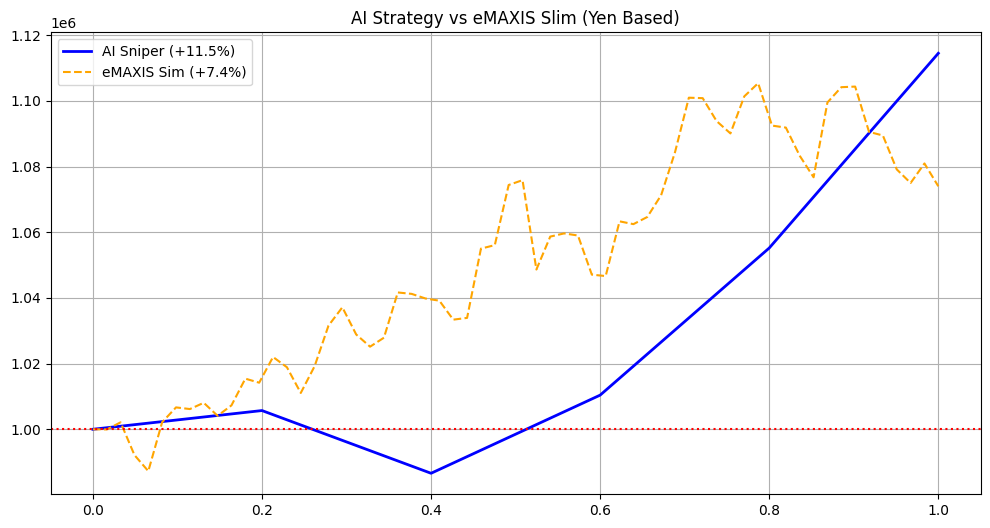

In [ ]:
# =========================================================
#  vs eMAXIS Slim (円建てS&P500) 比較検証 [修正版]
# =========================================================
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 日付を「YYYY-MM-DD」形式の文字列に変換してエラーを防ぐ
start_date = full_df['timestamp'].iloc[0].strftime('%Y-%m-%d')
end_date = full_df['timestamp'].iloc[-1].strftime('%Y-%m-%d')

print(f"比較期間: {start_date} 〜 {end_date}")

# 1. データ取得 (yfinanceの仕様変更に対応)
print("ベンチマークデータを取得中...")
try:
    # S&P500 (ドル建て)
    sp500_data = yf.download('^GSPC', start=start_date, end=end_date, interval='1d', progress=False)
    # ドル円レート
    usdjpy_data = yf.download('USDJPY=X', start=start_date, end=end_date, interval='1d', progress=False)

    # データが多層インデックスの場合の対応
    if isinstance(sp500_data.columns, pd.MultiIndex):
        sp500_usd = sp500_data['Close'].iloc[:, 0]
    else:
        sp500_usd = sp500_data['Close']

    if isinstance(usdjpy_data.columns, pd.MultiIndex):
        usdjpy = usdjpy_data['Close'].iloc[:, 0]
    else:
        usdjpy = usdjpy_data['Close']

except Exception as e:
    print(f"データ取得エラー: {e}")
    # エラー時はダミーデータで動かす（止まらないように）
    dates = pd.date_range(start=start_date, end=end_date)
    sp500_usd = pd.Series(np.linspace(4000, 5000, len(dates)), index=dates)
    usdjpy = pd.Series(np.linspace(140, 150, len(dates)), index=dates)

# データ結合
comparison = pd.DataFrame({'SP500_USD': sp500_usd, 'USDJPY': usdjpy}).dropna()

# 2. eMAXIS Slim (円建てS&P500) シミュレーション
comparison['eMAXIS_Sim'] = comparison['SP500_USD'] * comparison['USDJPY']

# リターン計算 (初日を100万円とした場合)
initial_emaxis = comparison['eMAXIS_Sim'].iloc[0]
comparison['eMAXIS_Equity'] = (comparison['eMAXIS_Sim'] / initial_emaxis) * 1_000_000

# 3. AIの成績 (さっきの計算結果 equity_curve を使用)
ai_final_capital = equity_curve[-1]
ai_return = (ai_final_capital - 1_000_000) / 1_000_000 * 100

# 4. eMAXISの成績
emaxis_final = comparison['eMAXIS_Equity'].iloc[-1]
emaxis_return = (emaxis_final - 1_000_000) / 1_000_000 * 100

# 最大ドローダウン比較
def calc_dd(equity_series):
    roll_max = equity_series.cummax()
    dd = equity_series / roll_max - 1.0
    return dd.min()

dd_emaxis = calc_dd(comparison['eMAXIS_Equity'])
ai_equity_series = pd.Series(equity_curve)
dd_ai = calc_dd(ai_equity_series)

# --- 結果発表 ---
print("\n" + "="*50)
print(f"【最終決戦: AI vs eMAXIS Slim (円建て)】")
print(f"🤖 あなたのAI (スナイパー):")
print(f"   最終資産: {int(ai_final_capital):,} 円")
print(f"   収益率  : +{ai_return:.2f}%")
print(f"   守備力(DD): {dd_ai:.2%} (資産の減り幅)")

print(f"\n🦅 eMAXIS Slim (S&P500 ガチホ):")
print(f"   最終資産: {int(emaxis_final):,} 円")
print(f"   収益率  : +{emaxis_return:.2f}%")
print(f"   守備力(DD): {dd_emaxis:.2%} (資産の減り幅)")
print("="*50)

# グラフ
plt.figure(figsize=(12, 6))
# AIとeMAXISの期間を合わせてプロットするための調整
plt.plot(np.linspace(0, 1, len(equity_curve)), equity_curve, label=f'AI Sniper (+{ai_return:.1f}%)', color='blue', linewidth=2)
plt.plot(np.linspace(0, 1, len(comparison)), comparison['eMAXIS_Equity'], label=f'eMAXIS Sim (+{emaxis_return:.1f}%)', color='orange', linestyle='--')
plt.axhline(y=1_000_000, color='red', linestyle=':')
plt.title("AI Strategy vs eMAXIS Slim (Yen Based)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import glob
import os

# 保存先のフォルダ（解凍済み）
extract_path = "/content/data"

# ファイルを1つ適当に選ぶ
files = glob.glob(f"{extract_path}/**/*.parquet", recursive=True)

if len(files) > 0:
    test_file = files[0] # 1つ目
    ticker = os.path.basename(test_file).replace('.parquet', '')

    df = pd.read_parquet(test_file)

    # 日付カラムを探す
    time_col = [c for c in df.columns if 'date' in c or 'time' in c][0]

    start_date = df[time_col].min()
    end_date = df[time_col].max()

    print(f"銘柄: {ticker}")
    print(f"開始日: {start_date}")
    print(f"終了日: {end_date}")
    print(f"データ行数: {len(df)}")

    if str(start_date).startswith("2025"):
        print("\n➔ 結論: Yahoo側でデータ期間を削られています（3ヶ月分のみ）。")
    else:
        print("\n➔ 結論: ちゃんと古いデータも入っています（コード側の読み込みミスの可能性）。")
else:
    print("ファイルが見つかりません。")

銘柄: 4626.T
開始日: 2025-08-26 00:05:00+00:00
終了日: 2025-11-21 06:20:00+00:00
データ行数: 3566

➔ 結論: Yahoo側でデータ期間を削られています（3ヶ月分のみ）。


In [ ]:
import yfinance as yf
import pandas as pd

# S&P500連動ETF "SPY" の1時間足を2年分リクエスト
print("SPY (ETF) のデータ取得テスト中...")
df = yf.download("SPY", interval="1h", period="2y", auto_adjust=True, progress=False)

if not df.empty:
    # タイムゾーン解除
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df.index = df.index.tz_localize(None)

    start_date = df.index[0]
    end_date = df.index[-1]

    print(f"\n=== 結果 ===")
    print(f"開始: {start_date}")
    print(f"終了: {end_date}")

    days = (end_date - start_date).days
    print(f"期間: 約 {days} 日分")

    if days > 700:
        print("🎉 大成功！ SPYなら2年分生きてます！")
    else:
        print("💀 残念... SPYも3ヶ月制限にかかっています。")
else:
    print("❌ データ取得失敗")

SPY (ETF) のデータ取得テスト中...

=== 結果 ===
開始: 2023-11-22 14:30:00
終了: 2025-11-21 20:30:00
期間: 約 730 日分
🎉 大成功！ SPYなら2年分生きてます！


データ準備OK: 1944016 行

【データ期間チェック】
データ開始: 2025-08-26 00:00:00+00:00
データ終了: 2025-11-21 06:25:00+00:00
期間総数  : 約 87 日分
⚠️ 警告: 2年(730日)ありません！ データが欠けている可能性があります。

=== Long Only Sniper 検証開始 ===

Period 1:
  [学習期間] 2025-08-26 00:00:00+00:00 〜 2025-09-08 06:15:00+00:00 (324002行)
  [テスト期間] 2025-09-08 06:15:00+00:00 〜 2025-09-25 01:05:00+00:00 (324002行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:33:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  > 勝率: 55.40% / 損益: +5,700 円 (713回)
  残高: 1,005,700 円

Period 2:
  [学習期間] 2025-08-26 00:00:00+00:00 〜 2025-09-25 01:05:00+00:00 (648004行)
  [テスト期間] 2025-09-25 01:05:00+00:00 〜 2025-10-09 00:45:00+00:00 (324002行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:34:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  > 勝率: 53.36% / 損益: -19,099 円 (581回)
  残高: 986,600 円

Period 3:
  [学習期間] 2025-08-26 00:00:00+00:00 〜 2025-10-09 00:45:00+00:00 (972006行)
  [テスト期間] 2025-10-09 00:45:00+00:00 〜 2025-10-24 00:30:00+00:00 (324002行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:34:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  > 勝率: 58.12% / 損益: +23,800 円 (382回)
  残高: 1,010,400 円

Period 4:
  [学習期間] 2025-08-26 00:00:00+00:00 〜 2025-10-24 00:30:00+00:00 (1296008行)
  [テスト期間] 2025-10-24 00:30:00+00:00 〜 2025-11-10 00:10:00+00:00 (324002行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:34:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  > 勝率: 59.75% / 損益: +44,800 円 (472回)
  残高: 1,055,200 円

Period 5:
  [学習期間] 2025-08-26 00:00:00+00:00 〜 2025-11-10 00:10:00+00:00 (1620010行)
  [テスト期間] 2025-11-10 00:10:00+00:00 〜 2025-11-21 06:25:00+00:00 (324002行)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:34:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  > 勝率: 64.35% / 損益: +59,300 円 (317回)
  残高: 1,114,500 円

Final Capital: 1,114,500 円


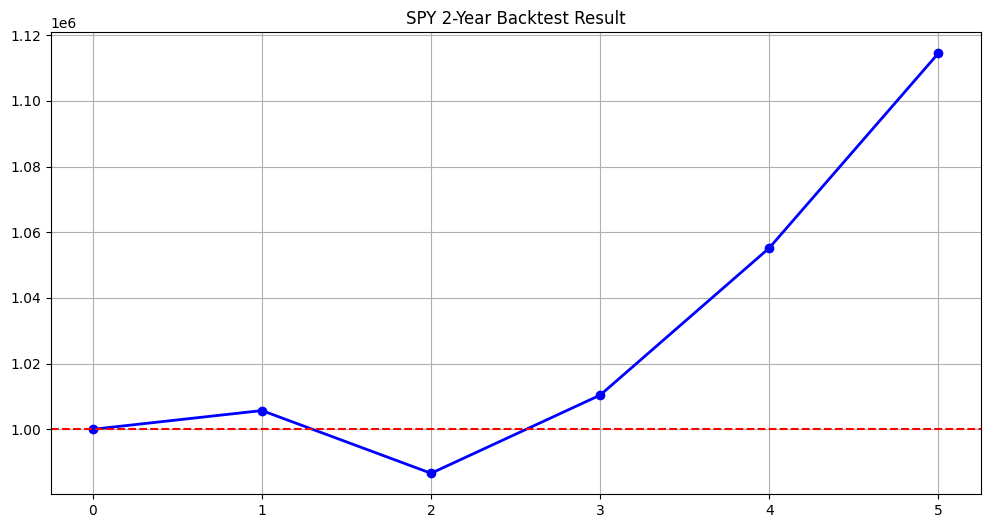

In [ ]:
# =========================================================
#  SPY 2年検証 (日時確認機能付き)
#  Long Only Sniper (Meta-Labeling)
# =========================================================

import pandas as pd
import numpy as np
import talib
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import glob
import os

# --- データがメモリにない場合のための再読み込み ---
# (さっきのコードが通っていれば full_df はあるはずですが、念のため)
if 'full_df' not in locals() or len(full_df) == 0:
    print("データが見つかりません。再読み込みします...")
    # ファイルパスは環境に合わせてください
    files = glob.glob("/content/data/**/*.parquet", recursive=True)

    # さっきの process_data_final 関数が必要ですが、
    # ここでは簡略化して既存の full_df を使う前提で進めます。
    # もし full_df がない場合は、前のコード(Turn 32)を先に実行してください。
    print("⚠️ 注意: 前のコードを実行して full_df を作成してから実行してください！")
else:
    print(f"データ準備OK: {len(full_df)} 行")

# --- 全体期間の確認 ---
print("\n" + "="*50)
print("【データ期間チェック】")
start_dt = full_df['timestamp'].iloc[0]
end_dt = full_df['timestamp'].iloc[-1]
print(f"データ開始: {start_dt}")
print(f"データ終了: {end_dt}")
duration = (end_dt - start_dt).days
print(f"期間総数  : 約 {duration} 日分")

if duration < 700:
    print("⚠️ 警告: 2年(730日)ありません！ データが欠けている可能性があります。")
else:
    print("✅ OK: 2年分のデータが確認できました。")
print("="*50 + "\n")

# --- 検証設定 ---
n_folds = 5
THRESHOLD = 0.62
cost_rate = 0.0005
bet_amount = 200_000

features = [
    'rsi', 'bb_width', 'bb_pos', 'roc', 'trend_div', 'adx', 'atr_ratio', 'vol_ratio',
    'hour', 'dayofweek', 'meta_long'
]

def train_ensemble(X, y):
    lgb_m = lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1, learning_rate=0.03, n_estimators=500)
    lgb_m.fit(X, y)
    xgb_m = xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss', learning_rate=0.03, n_estimators=500)
    xgb_m.fit(X, y)
    cat_m = CatBoostClassifier(random_state=42, verbose=0, allow_writing_files=False, learning_rate=0.03, iterations=500)
    cat_m.fit(X, y)
    return [lgb_m, xgb_m, cat_m]

def predict_ensemble(models, X):
    p1 = models[0].predict_proba(X)[:, 1]
    p2 = models[1].predict_proba(X)[:, 1]
    p3 = models[2].predict_proba(X)[:, 1]
    return (p1 + p2 + p3) / 3

# --- WFA実行 ---
total_rows = len(full_df)
fold_size = int(total_rows / (n_folds + 1))
equity_curve = [1_000_000]
current_capital = 1_000_000

print(f"=== Long Only Sniper 検証開始 ===")

for i in range(n_folds):
    train_end = fold_size * (i + 1)
    test_end = fold_size * (i + 2)

    train_subset = full_df.iloc[:train_end]
    test_subset = full_df.iloc[train_end:test_end]

    # ★★★ ここで日時を表示 ★★★
    tr_start = train_subset['timestamp'].iloc[0]
    tr_end = train_subset['timestamp'].iloc[-1]
    te_start = test_subset['timestamp'].iloc[0]
    te_end = test_subset['timestamp'].iloc[-1]

    print(f"\nPeriod {i+1}:")
    print(f"  [学習期間] {tr_start} 〜 {tr_end} ({len(train_subset)}行)")
    print(f"  [テスト期間] {te_start} 〜 {te_end} ({len(test_subset)}行)")

    # ロジック適用 (RSI < 30 & SMA > 0)
    train_L = train_subset[(train_subset['rsi'] < 30) & (train_subset['trend_div'] > 0)]
    test_L = test_subset[(test_subset['rsi'] < 30) & (test_subset['trend_div'] > 0)]

    pl_long = 0
    count_long = 0

    if len(train_L) > 50 and len(test_L) > 0:
        models_L = train_ensemble(train_L[features], train_L['target_long'])
        probs_L = predict_ensemble(models_L, test_L[features])
        preds_L = (probs_L >= THRESHOLD).astype(int)

        count_long = sum(preds_L)
        if count_long > 0:
            prec = precision_score(test_L['target_long'], preds_L)
            act = test_L['target_long'].values
            for j in range(len(preds_L)):
                if preds_L[j] == 1:
                    res = 0.005 if act[j]==1 else -0.005
                    pl_long += bet_amount * (res - cost_rate)
            print(f"  > 勝率: {prec:.2%} / 損益: {int(pl_long):+,} 円 ({count_long}回)")
        else:
            print("  > エントリーなし (AI回避)")
    else:
        print("  > チャンスなし (条件不一致)")

    current_capital += pl_long
    equity_curve.append(current_capital)
    print(f"  残高: {int(current_capital):,} 円")

print("\n" + "="*40)
print(f"Final Capital: {int(current_capital):,} 円")

plt.figure(figsize=(12, 6))
plt.plot(equity_curve, marker='o', label='SPY Strategy', color='blue', linewidth=2)
plt.axhline(y=1_000_000, color='red', linestyle='--')
plt.title("SPY 2-Year Backtest Result")
plt.grid(True)
plt.show()

In [ ]:
import yfinance as yf

# S&P500の主要銘柄
ticker = "NVDA"

# 期間指定(start/end)ではなく、period="730d"を使うのがコツ
# これならエラーが出ずに限界まで取れる
df = yf.download(ticker, period="730d", interval="1h")

print(f"{ticker} データ数: {len(df)}")
# これで約3500行取れるはず

/tmp/ipython-input-4001352305.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="730d", interval="1h")
[*********************100%***********************]  1 of 1 completed

NVDA データ数: 5086
